<img align="centre" width="300" height="300" src="AnguilVanier_Alejandra_DA301_Assignment_Logo Turtle Games.png">

<h2><center>TURTLE GAMES ANALYSIS:</center></h2>    
<h2><center>PREDICTING FUTURE OUTCOMES</center></h2>
<h3><center>MARKETING DEPARTMENT</center></h3>  

## BACKGROUND AND CONTEXT 
Turtle Games is a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends.

The project has been split into two departments:
- Marketing, which will be performed in Python (Questions 1, 2 and 3)
- Sales, which is the task we will carry on in R (Questions 4, 5 and 6)

For the Marketing department, the main questions Turtle Games wants to explore are:
- Question 1: how customers accumulate loyalty points.
- Question 2: how groups within the customer base can be used to target specific market segments.
- Question 3: how social data (e.g. customer reviews) can be used to inform marketing campaigns.

dAtaAnalysisAV has been tasked to look into this project for Turtle Games using the information provided about customers, customer reviews and overall sales.
 
This Notebook is the collection of all Python codes applied to uncover trends and patterns, and predict future outcomes, on the data set provided by the Marketing Department on Turtle Games: turtle_reviews.csv.

#### Please follow the link below to the GitHub repository where this Jypiter Notebook, the Executive Summary and the Presentation are stored, along with all the supporting files:

#### [Alejandra Anguil Vanier GitHub repository](https://github.com/AlejandraAnguilVanier/AnguilVanier_Alejandra_DA301_Assignment)

<img align="right" width="250" height="250" src="AnguilVanier_Alejandra_DA301_Assignment_Logo AAV.png">

# 

# Question 1: how customers accumulate loyalty points.
The marketing department wants to better understand how users accumulate loyalty points. Therefore, we need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores.

## Steps we will follow:
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Linear regression assumptions.
6. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
7. Include our preliminary insights and observations.
8. Multiple linear regression.
9. Observations and insights.

## 1. Load and explore the data

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.stats.api as sms
import sklearn
import math

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('AnguilVanier_Alejandra_DA301_Assignment_files/turtle_reviews.csv') 

# View the DataFrame.
print(reviews.shape)
reviews.head()

(2000, 11)


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


> We don't have any missing values (as shown already in the previous step) and we have a mix of data types: categorical ("object"), integers ("int64") and decimals ("float64"). We will see later on if we need to do any transformation to these columns.

In [5]:
# Descriptive statistics.
reviews.describe().round(2)

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.00            2000.00                 2000.00         2000.00   
mean     39.49              48.08                   50.00         1578.03   
std      13.57              23.12                   26.09         1283.24   
min      17.00              12.30                    1.00           25.00   
25%      29.00              30.34                   32.00          772.00   
50%      38.00              47.15                   50.00         1276.00   
75%      49.00              63.96                   73.00         1751.25   
max      72.00             112.34                   99.00         6847.00   

        product  
count   2000.00  
mean    4320.52  
std     3148.94  
min      107.00  
25%     1589.25  
50%     3624.00  
75%     6654.00  
max    11086.00

> We can already see that the columns age, remuneration and spending_score have a similar scale (min and max don't differ too much), but loyalty_points and product have a much higher max. Again, we may need to do some transformation before working with this data.

## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 'platform'], axis=1)

# View the DataFrame.
print(reviews.shape)
reviews.head()

(2000, 9)


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   int64  
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 3. Rename columns

In [8]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})

# View the DataFrame.
print(reviews.shape)
reviews.head()

(2000, 9)


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews.to_csv('AnguilVanier_Alejandra_DA301_Assignment_files/turtle_reviews_cleaned.csv', index=False)

In [10]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('AnguilVanier_Alejandra_DA301_Assignment_files/turtle_reviews_cleaned.csv') 

# View DataFrame.
print(reviews.shape)
reviews.head()

(2000, 9)


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

> We have now done some data cleaning and we have a dataframe ready to be analysed, which doesn't contained unwanted columns, missing values and the column names are standardised.

## 5. Linear regression assumptions

#### Before doing the linear regression analysis, there are six assumptions that  need to be checked to determine the accuracy of a predictive model:
- Exogeneity
- Residuals are independent
- Significant outliers or missing values
- Normality (i.e. normal distribution) of y
- Linearity 
- Homoscedasticity

### 5a) Exogeneity

We need to confirm that the independent variables X (in this case age/renumeration/spending scores) are not dependent on the dependent variable y (in this case  loyalty points).

We know that loyalty points does not affect a customer age, remuneration or the spending score. Therefore, the independent variables (X) are exogenous and not dependent on the independent variable (y).

### 5b) Residuals are independent

One way to determine if this assumption is met is to perform a ***Durbin-Watson test***, which is used to detect the presence of autocorrelation in the residuals of a regression. The Durbin-Watson statistic returns a value between 0 and 4:
- A test statistic of 2 indicates no serial correlation.
- The closer the test statistics is to 0, the more evidence of positive serial correlation.
- The closer the test statistics is to 4, the more evidence of negative serial correlation.

As a rule of thumb, test statistic values between the range of 1.5 and 2.5 are considered normal. However, values outside of this range could indicate that autocorrelation is a problem.

Once we fit the model and we get the OLS results, we will be able to check this score and make a decision.

### 5c) Significant outliers or missing values.
We have already checked there are no missing values on the dataset. Let's check now outliers.

First we will do it on the dependent variable (loyalty_points).

<AxesSubplot:xlabel='loyalty_points'>

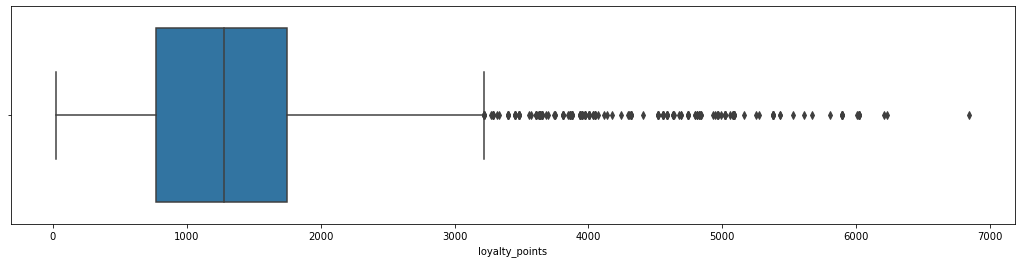

In [11]:
# Create a boxplot to check possible outliers in the loyalty_points column.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=reviews, x='loyalty_points')

> We see there is presence of outliers.

In [12]:
# Calculate quantiles and IQR.
lp_Q1 = reviews['loyalty_points'].quantile(0.25) 
lp_Q3 = reviews['loyalty_points'].quantile(0.75)
lp_IQR = lp_Q3 - lp_Q1
lp_IQR

979.25

In [13]:
# Return a boolean array of the rows with (any) non-outlier column values.
lp_condition = ~((reviews['loyalty_points'] < (lp_Q1 - 1.5 * lp_IQR)) | (reviews['loyalty_points'] > (lp_Q3 + 1.5 * lp_IQR)))

# Filter DataFrame based on condition.
reviews_non_outlier_lp = reviews[lp_condition]
reviews_non_outlier_lp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          1734 non-null   object 
 1   age             1734 non-null   int64  
 2   remuneration    1734 non-null   float64
 3   spending_score  1734 non-null   int64  
 4   loyalty_points  1734 non-null   int64  
 5   education       1734 non-null   object 
 6   product         1734 non-null   int64  
 7   review          1734 non-null   object 
 8   summary         1734 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 135.5+ KB


<AxesSubplot:xlabel='loyalty_points'>

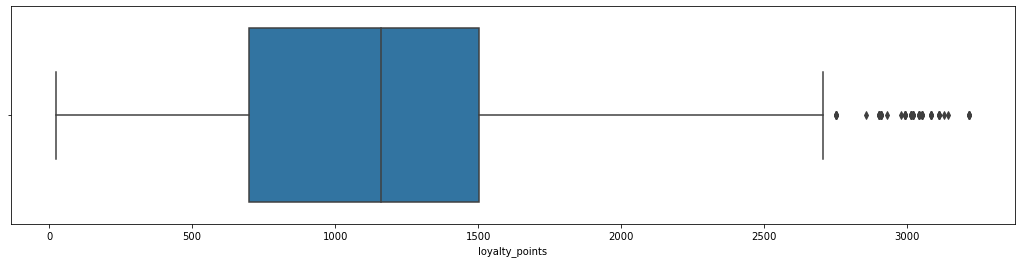

In [14]:
# Create a boxplot to check the updated column without outliers
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=reviews_non_outlier_lp, x='loyalty_points')

> We have removed the outliers from the dependent variable column. However, we will proceed to fit the regression model with and without outliers to compare the performance and make a decision. 

Let's check now the independent variables too.

<AxesSubplot:xlabel='age'>

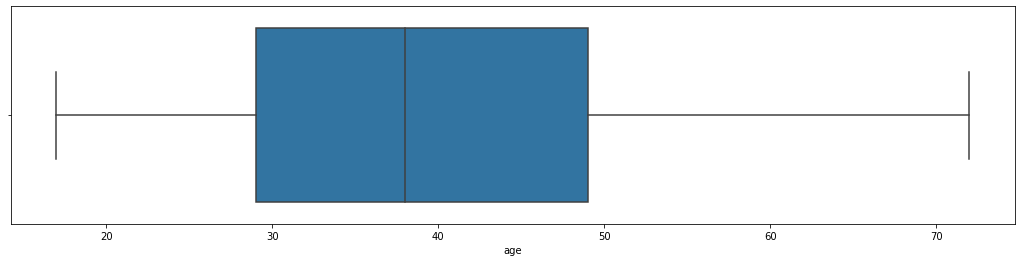

In [15]:
# Create a boxplot to check possible outliers in the age column.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=reviews, x='age')

<AxesSubplot:xlabel='remuneration'>

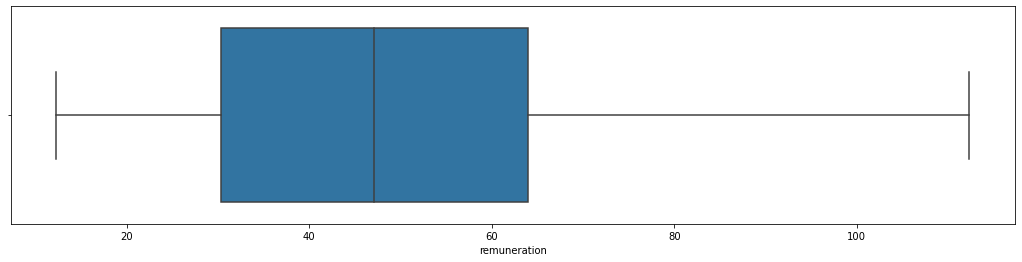

In [16]:
# Create a boxplot to check possible outliers in the remuneration column.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=reviews, x='remuneration')

<AxesSubplot:xlabel='spending_score'>

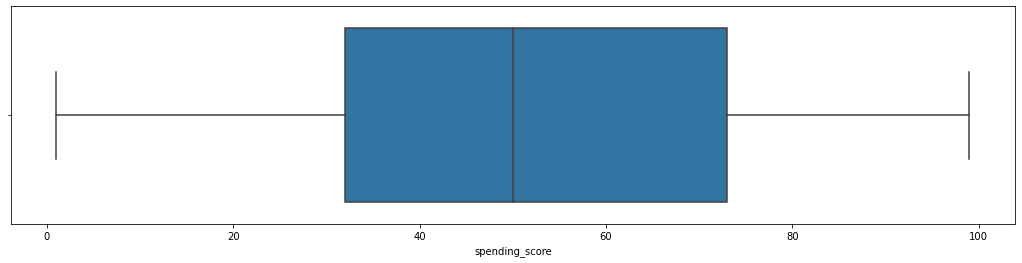

In [17]:
# Create a boxplot to check possible outliers in the spending_score column.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=reviews, x='spending_score')

> We can see the independent variables don't have any outliers.

### 5d) Normality (i.e. normal distribution) of y

<AxesSubplot:xlabel='loyalty_points', ylabel='Count'>

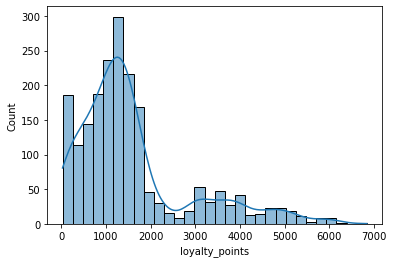

In [18]:
# Create a histogram to check the distribution of y on the full dataset.
sns.histplot(data = reviews, x='loyalty_points', bins=30, kde=True)

<AxesSubplot:xlabel='loyalty_points', ylabel='Count'>

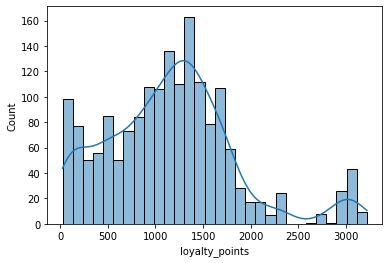

In [19]:
# And now create a histogram to check the distribution of y on dataset without outliers.
sns.histplot(data = reviews_non_outlier_lp, x='loyalty_points', bins=30, kde=True)

> We can see the distribution of loyalty points without outliers is closer to a normal distribution than the data with outliers, but still not quite what we are looking for to apply a linear regression model.

> Let's transform this column once more to see if we can improve this distribution: we will apply the log function to both and see how they perform.

In [20]:
# Apply the log function to the full dataset.
reviews['log_loyalty_points'] = np.log(reviews['loyalty_points'])

<AxesSubplot:xlabel='log_loyalty_points', ylabel='Count'>

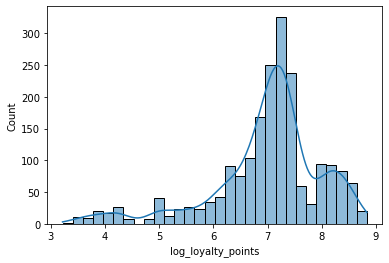

In [21]:
# Create a histogram to check the distribution of y transformed on the full dataset.
sns.histplot(data = reviews, x='log_loyalty_points', bins=30, kde=True)

In [22]:
# Apply the log function to the dataset without outliers.
reviews_non_outlier_lp['log_loyalty_points'] = np.log(reviews_non_outlier_lp['loyalty_points'])

<AxesSubplot:xlabel='log_loyalty_points', ylabel='Count'>

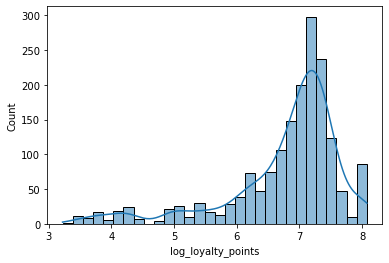

In [23]:
# Create a histogram to check the distribution of y transformed on dataset without outliers.
sns.histplot(data = reviews_non_outlier_lp, x='log_loyalty_points', bins=30, kde=True)

> Both of them perform better with the transformed data, but the long tails still show non normality. However, we will need to check how these perform once we fit the model. Therefore we will fit a few models and compare them.

### 5e) Linearity 
The linearity assumption states that the relationship between each independent variable (X) and the dependent variable (y) is linear. We can check the linearity with a scatterplot. 

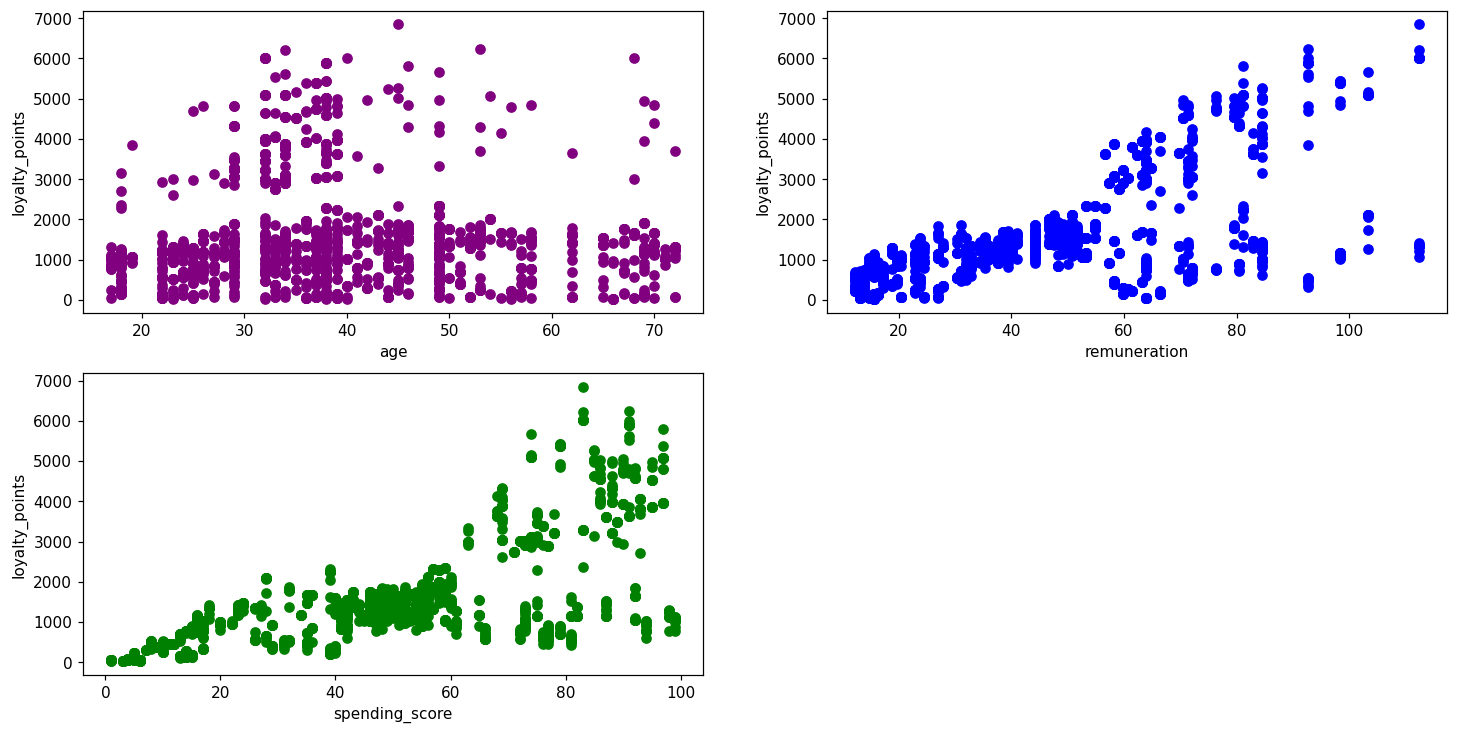

In [24]:
# Let's check first on the full set with the non-transformed y.
plt.figure(figsize=(16, 8), dpi=110)
plt.subplot(2,2,1)
plt.xlabel('age')
plt.ylabel('loyalty_points')
plt.scatter(data=reviews, y='loyalty_points', x='age', color='purple')

plt.subplot(2,2,2)
plt.xlabel('remuneration')
plt.ylabel('loyalty_points')
plt.scatter(data=reviews, y='loyalty_points', x='remuneration', color='blue')

plt.subplot(2,2,3)
plt.xlabel('spending_score')
plt.ylabel('loyalty_points')
plt.scatter(data=reviews, y='loyalty_points', x='spending_score', color='green')

plt.show()

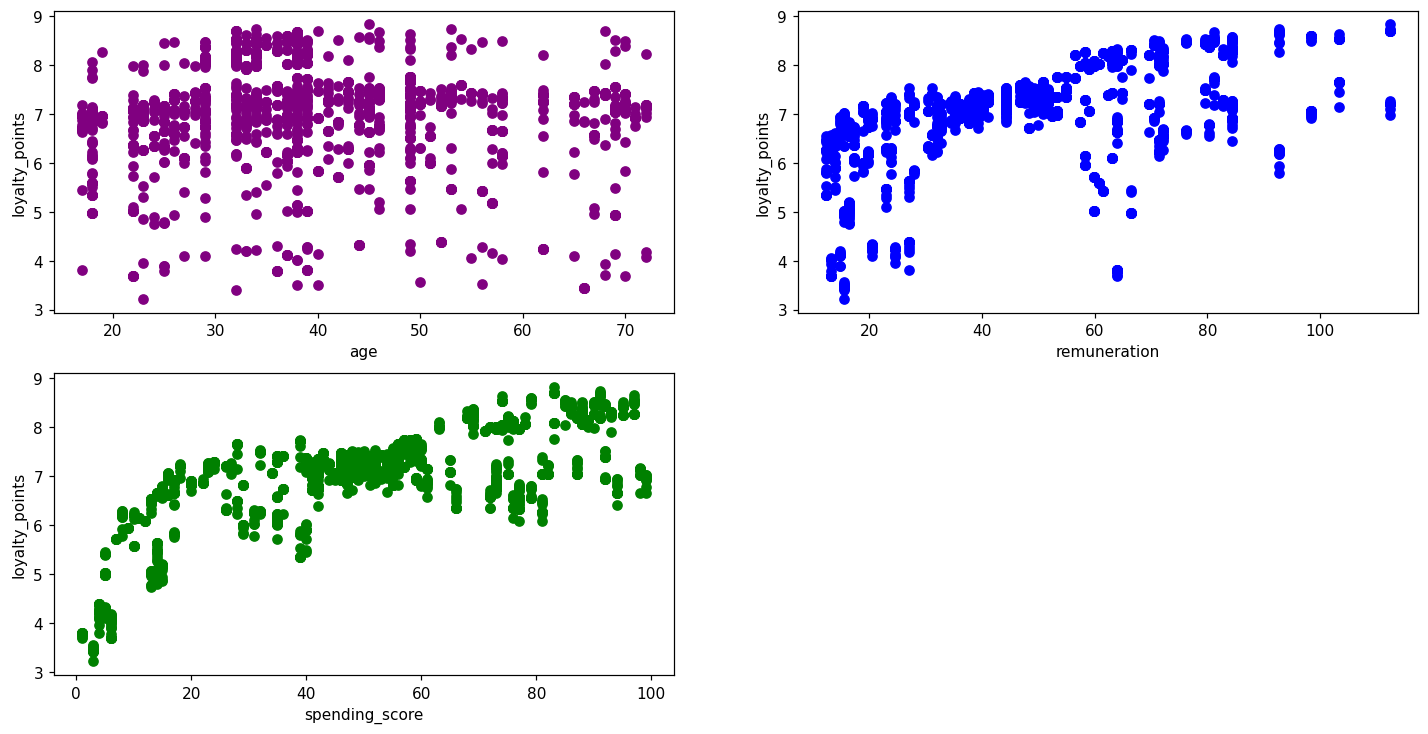

In [25]:
# Now we are going to check on the full set with the transformed y.
plt.figure(figsize=(16, 8), dpi=110)
plt.subplot(2,2,1)
plt.xlabel('age')
plt.ylabel('loyalty_points')
plt.scatter(data=reviews, y='log_loyalty_points', x='age', color='purple')

plt.subplot(2,2,2)
plt.xlabel('remuneration')
plt.ylabel('loyalty_points')
plt.scatter(data=reviews, y='log_loyalty_points', x='remuneration', color='blue')

plt.subplot(2,2,3)
plt.xlabel('spending_score')
plt.ylabel('loyalty_points')
plt.scatter(data=reviews, y='log_loyalty_points', x='spending_score', color='green')

plt.show()

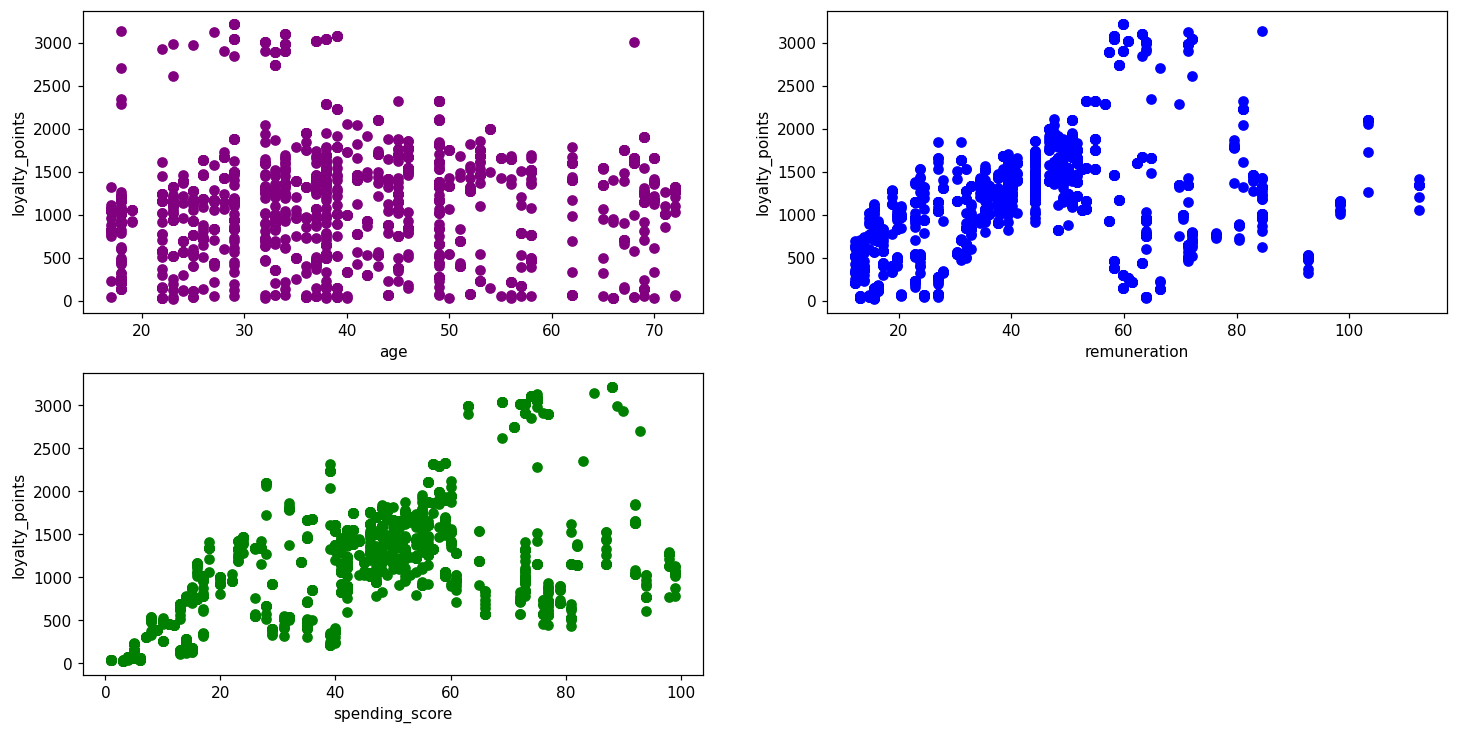

In [26]:
# Now we are going to check on the set without outliers with the non-transformed y.
plt.figure(figsize=(16, 8), dpi=110)
plt.subplot(2,2,1)
plt.xlabel('age')
plt.ylabel('loyalty_points')
plt.scatter(data=reviews_non_outlier_lp, y='loyalty_points', x='age', color='purple')

plt.subplot(2,2,2)
plt.xlabel('remuneration')
plt.ylabel('loyalty_points')
plt.scatter(data=reviews_non_outlier_lp, y='loyalty_points', x='remuneration', color='blue')

plt.subplot(2,2,3)
plt.xlabel('spending_score')
plt.ylabel('loyalty_points')
plt.scatter(data=reviews_non_outlier_lp, y='loyalty_points', x='spending_score', color='green')

plt.show()

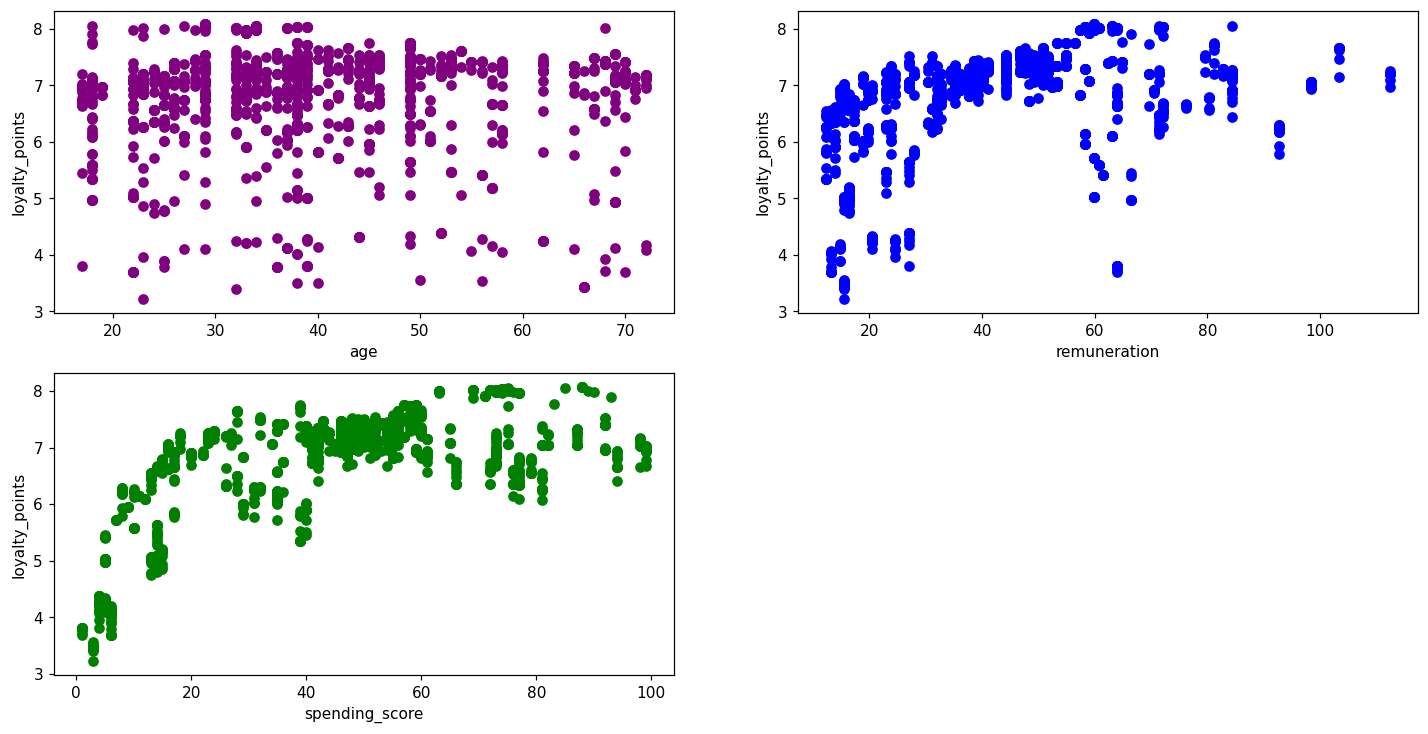

In [27]:
# And finally we are going to check on the set without outliers with the transformed y.
plt.figure(figsize=(16, 8), dpi=110)
plt.subplot(2,2,1)
plt.xlabel('age')
plt.ylabel('loyalty_points')
plt.scatter(data=reviews_non_outlier_lp, y='log_loyalty_points', x='age', color='purple')

plt.subplot(2,2,2)
plt.xlabel('remuneration')
plt.ylabel('loyalty_points')
plt.scatter(data=reviews_non_outlier_lp, y='log_loyalty_points', x='remuneration', color='blue')

plt.subplot(2,2,3)
plt.xlabel('spending_score')
plt.ylabel('loyalty_points')
plt.scatter(data=reviews_non_outlier_lp, y='log_loyalty_points', x='spending_score', color='green')

plt.show()

> On all of them we can see there is not a clear relationship between the loyalty points and age (which makes sense), but a sort of positive linear relationship with salary and spending score. We will draw more conclusions after we perform the regression analysis. However, it feels the positive liner relationship is better on the full dataset with the non transformed y variable.

### 5f) Homoscedasticity

Homoscedasticity indicates the variances of the residuals are similar or constant variance(s). Without homoscedasticity, the standard errors of the regression coefficient estimates are invalid. This means that you might declare a term as statistically significant when it actually isn’t.  

When testing for homoscedasticity, you can assume the following hypotheses:

- Ho = Homoscedasticity at p>=0.05 (the residuals are distributed with equal variance)
- Ha = Heteroscedasticity at p<0.05 (the residuals are not distributed with equal variance)

Once we fit the model we can run the ***Breusch-Pagan test***, and check the presence of homoscedasticity or heteroscedasticity.

## 6. Linear regression

### 6a) spending vs loyalty (full dataset, non-transformed y)

In [28]:
# Independent variable.
x_1 = reviews['spending_score'] 

# Dependent variable.
y = reviews['loyalty_points'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x_1'
test_1 = ols(f, data = reviews).fit()

# Print the regression table.
test_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        12:04:42   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x_1           33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The Durbin-Watson test shows a score of 1.191 (between the range of 1.5 and 2.5) and therefore we don't consider that autocorrelation is a problem.

> The p value for the independent variable is 0 and therefore we consider it to be very significant. 

> However, looking at the R-squared we see that only a 45% of the variability on the loyalty points is explained by the variability on this independent variable (spending score).

In [29]:
# Extract the estimated parameters.
print("Parameters: ", test_1.params) 

# Extract the standard errors.
print("Standard errors: ", test_1.bse)    

# Extract the predicted values.
print("Predicted values: ", test_1.predict()) 

Parameters:  Intercept   -75.052663
x_1          33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x_1           0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [30]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_1 = (-75.052663) + (33.061693 * x_1) 

# View the output.
y_pred_1

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

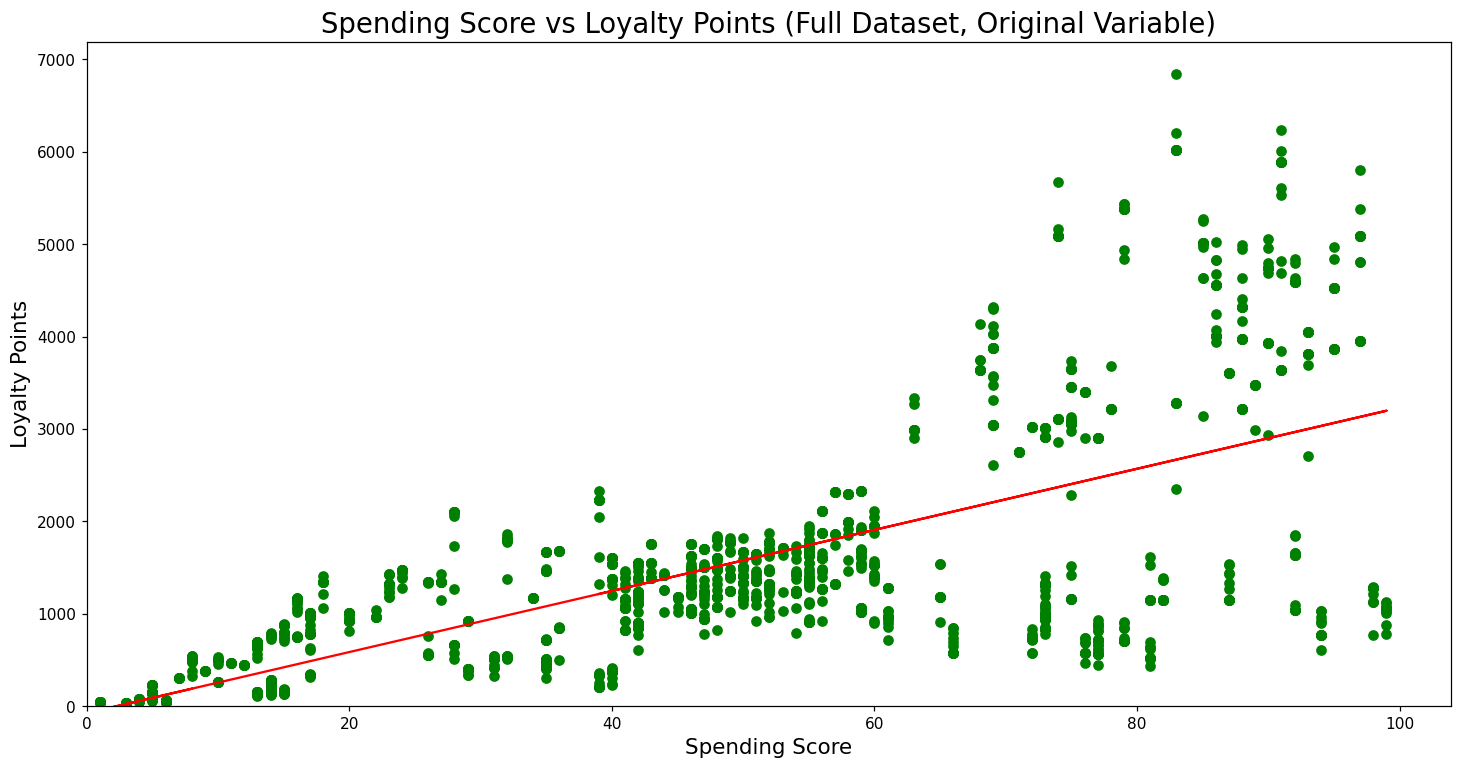

In [31]:
# Plot the graph with a regression line.
plt.figure(figsize=(16, 8), dpi=110)
plt.scatter(x_1, y, color='green')

# Plot the regression line (in red).
plt.plot(x_1, y_pred_1, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Label axes and add a title
plt.xlabel('Spending Score', fontsize=14)
plt.ylabel('Loyalty Points', fontsize=14)
plt.title('Spending Score vs Loyalty Points (Full Dataset, Original Variable)', fontsize=18)

# View the plot.
plt.show()

In [32]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_1 = sms.het_breuschpagan(test_1.resid, test_1.model.exog)

# Print the results of the Breusch-Pagan test.
terms_1 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_1, test_1)))

{'LM stat': 629.982336021591, 'LM Test p-value': 5.042699614942813e-139, 'F-stat': 918.7507142907725, 'F-test p-value': 2.3037887924501407e-166}


> Since the LM Test p-value is lower than 0.05, we reject the Ho and assume that heteroscedasticity is present. Which actually we can see from the plot as we have a cone shape distribution, and the variances of the residuals are not constant.

### 6a) spending vs loyalty (full dataset, transformed y)

In [33]:
# Independent variable.
x_1 = reviews['spending_score'] 

# Dependent variable.
y_log = reviews['log_loyalty_points'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y_log ~ x_1'
test_1_log = ols(f, data = reviews).fit()

# Print the regression table.
test_1_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2153.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          1.44e-319
Time:                        12:04:43   Log-Likelihood:                -2146.7
No. Observations:                2000   AIC:                             4297.
Df Residuals:                    1998   BIC:                             4309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5740      0.034    162.833      0.000       5.507       5.641
x_1            0.0282      0.001     46.400      0.000       0.027       0.029
==============================================================================
Omnibus:                      247.764   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.804
Skew:                          -1.000   Prob(JB):                     1.34e-75
Kurtosis:                       3.366   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The Durbin-Watson test shows a score of 0.562 and therefore we consider that a positive autocorrelation is a problem in this case.

> However, the p value for the independent variable is 0 and therefore we consider it to be very significant. 

> But looking at the R-squared we see that only a 52% of the variability on the loyalty points is explained by the variability on this independent variable (spending score). It has improved a bit from the previous one where we used the non transformed y, which was a 45%.

In [34]:
# Extract the estimated parameters.
print("Parameters: ", test_1_log.params) 

# Extract the standard errors.
print("Standard errors: ", test_1_log.bse)    

# Extract the predicted values.
print("Predicted values: ", test_1_log.predict()) 

Parameters:  Intercept    5.573981
x_1          0.028163
dtype: float64
Standard errors:  Intercept    0.034231
x_1          0.000607
dtype: float64
Predicted values:  [6.67235588 7.85522067 5.74296212 ... 8.13685514 6.02459659 5.79928901]


In [35]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_1_log = (5.573981) + (0.028163 * x_1) 

# View the output.
y_pred_1_log

0       6.672338
1       7.855184
2       5.742959
3       7.742532
4       6.700501
          ...   
1995    7.517228
1996    5.799285
1997    8.136814
1998    6.024589
1999    5.799285
Name: spending_score, Length: 2000, dtype: float64

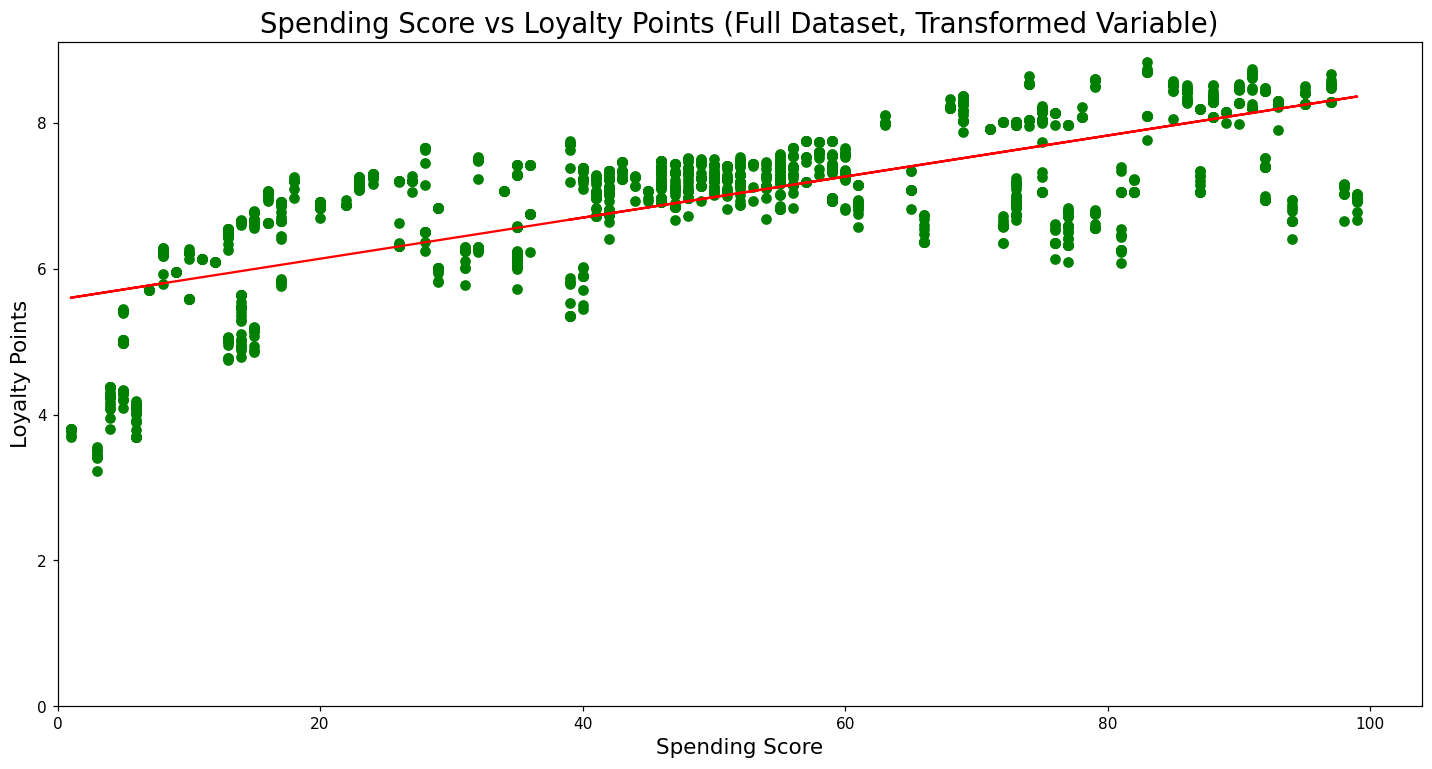

In [36]:
# Plot the graph with a regression line.
plt.figure(figsize=(16, 8), dpi=110)
plt.scatter(x_1, y_log, color='green')

# Plot the regression line (in red).
plt.plot(x_1, y_pred_1_log, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Label axes and add a title
plt.xlabel('Spending Score', fontsize=14)
plt.ylabel('Loyalty Points', fontsize=14)
plt.title('Spending Score vs Loyalty Points (Full Dataset, Transformed Variable)', fontsize=18)

# View the plot.
plt.show()

In [37]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_1_log = sms.het_breuschpagan(test_1_log.resid, test_1_log.model.exog)

# Print the results of the Breusch-Pagan test.
terms_1_log = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_1_log, test_1_log)))

{'LM stat': 92.4511694198502, 'LM Test p-value': 6.90066058514846e-22, 'F-stat': 96.83497142491592, 'F-test p-value': 2.4043577159843284e-22}


> Since the LM Test p-value is lower than 0.05, we reject the Ho and assume that heteroscedasticity is present. However, it has improved from the previous test with the non transformed y variable.

### 6a) spending vs loyalty (dataset without outliers, non-transformed y)

In [38]:
# Independent variable.
x_1_non_out = reviews_non_outlier_lp['spending_score'] 

# Dependent variable.
y_non_out = reviews_non_outlier_lp['loyalty_points'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y_non_out ~ x_1_non_out'
test_1_non_out = ols(f, data = reviews_non_outlier_lp).fit()

# Print the regression table.
test_1_non_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_non_out   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     741.8
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          2.94e-136
Time:                        12:04:43   Log-Likelihood:                -13468.
No. Observations:                1734   AIC:                         2.694e+04
Df Residuals:                    1732   BIC:                         2.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     450.9021     29.307     15.385      0.000     393.421     508.384
x_1_non_out    15.7800      0.579     27.237      0.000      14.644      16.916
==============================================================================
Omnibus:                       51.429   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.291
Skew:                           0.428   Prob(JB):                     9.86e-13
Kurtosis:                       3.180   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The Durbin-Watson test shows a score of 1.063 and therefore we consider that a positive autocorrelation is a problem in this case.

> However, the p value for the independent variable is 0 and therefore we consider it to be very significant. 

> But looking at the R-squared we see that only a 30% of the variability on the loyalty points is explained by the variability on this independent variable (spending score). This is the lowest percentage so far.

In [39]:
# Extract the estimated parameters.
print("Parameters: ", test_1_non_out.params) 

# Extract the standard errors.
print("Standard errors: ", test_1_non_out.bse)    

# Extract the predicted values.
print("Predicted values: ", test_1_non_out.predict()) 

Parameters:  Intercept      450.902120
x_1_non_out     15.779969
dtype: float64
Standard errors:  Intercept      29.307291
x_1_non_out     0.579368
dtype: float64
Predicted values:  [1066.32092425 1729.07963624  545.58193626 ...  577.14187493  703.38162959
  577.14187493]


In [40]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_1_non_out = (450.902120) + (15.779969 * x_1_non_out) 

# View the output.
y_pred_1_non_out

0       1066.320911
1       1729.079609
2        545.581934
3       1665.959733
4       1082.100880
           ...     
1992     719.161593
1994     813.841407
1996     577.141872
1998     703.381624
1999     577.141872
Name: spending_score, Length: 1734, dtype: float64

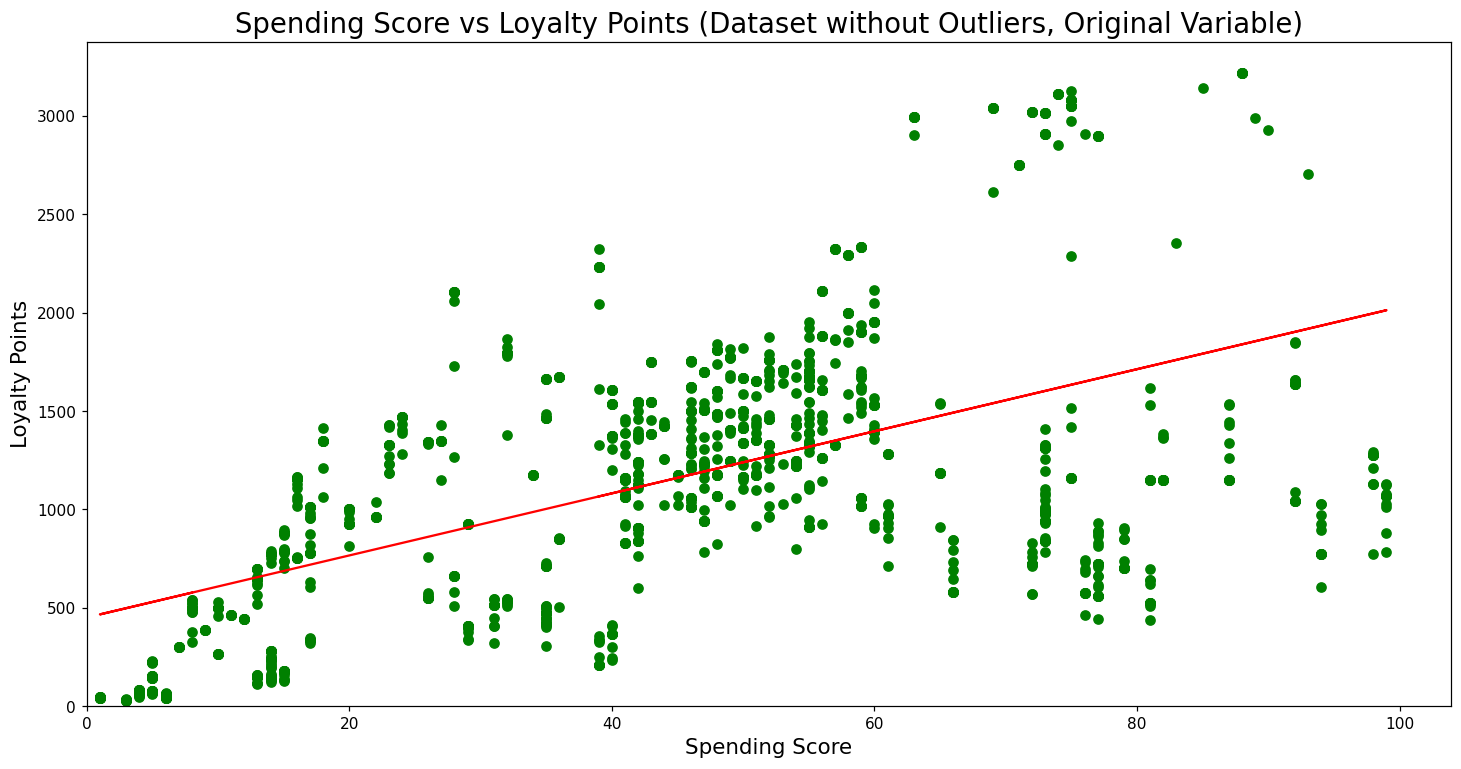

In [41]:
# Plot the graph with a regression line.
plt.figure(figsize=(16, 8), dpi=110)
plt.scatter(x_1_non_out, y_non_out, color='green')

# Plot the regression line (in red).
plt.plot(x_1_non_out, y_pred_1_non_out, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Label axes and add a title
plt.xlabel('Spending Score', fontsize=14)
plt.ylabel('Loyalty Points', fontsize=14)
plt.title('Spending Score vs Loyalty Points (Dataset without Outliers, Original Variable)', fontsize=18)

# View the plot.
plt.show()

In [42]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_1_non_out = sms.het_breuschpagan(test_1_non_out.resid, test_1_non_out.model.exog)

# Print the results of the Breusch-Pagan test.
terms_1_non_out = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_1_non_out, test_1_non_out)))

{'LM stat': 353.2507670123138, 'LM Test p-value': 8.303252463568291e-79, 'F-stat': 443.11473354320805, 'F-test p-value': 8.913007314001163e-88}


> Since the LM Test p-value is lower than 0.05, we reject the Ho and assume that heteroscedasticity is present.

### 6a) spending vs loyalty (dataset without outliers, transformed y)

In [43]:
# Independent variable.
x_1_non_out = reviews_non_outlier_lp['spending_score'] 

# Dependent variable.
y_non_out_log = reviews_non_outlier_lp['log_loyalty_points'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y_non_out_log ~ x_1_non_out'
test_1_non_out_log = ols(f, data = reviews_non_outlier_lp).fit()

# Print the regression table.
test_1_non_out_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          y_non_out_log   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     1079.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          1.96e-184
Time:                        12:04:43   Log-Likelihood:                -1910.9
No. Observations:                1734   AIC:                             3826.
Df Residuals:                    1732   BIC:                             3837.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.6867      0.037    152.208      0.000       5.613       5.760
x_1_non_out     0.0243      0.001     32.856      0.000       0.023       0.026
==============================================================================
Omnibus:                      215.773   Durbin-Watson:                   0.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.624
Skew:                          -0.998   Prob(JB):                     8.66e-66
Kurtosis:                       3.405   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The Durbin-Watson test shows a score of 0.578 and therefore we consider that a positive autocorrelation is a problem in this case.

> However, the p value for the independent variable is 0 and therefore we consider it to be very significant. 

> But looking at the R-squared we see that only a 38% of the variability on the loyalty points is explained by the variability on this independent variable (spending score). This is a slight improvement from the previous one on this dataset, but still lower than the ones with the full dataset.

In [44]:
# Extract the estimated parameters.
print("Parameters: ", test_1_non_out_log.params) 

# Extract the standard errors.
print("Standard errors: ", test_1_non_out_log.bse)    

# Extract the predicted values.
print("Predicted values: ", test_1_non_out_log.predict()) 

Parameters:  Intercept      5.686684
x_1_non_out    0.024267
dtype: float64
Standard errors:  Intercept      0.037361
x_1_non_out    0.000739
dtype: float64
Predicted values:  [6.63308345 7.65228287 5.83228391 ... 5.88081721 6.07495044 5.88081721]


In [45]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_1_non_out_log = (5.686684) + (0.024267 * x_1_non_out) 

# View the output.
y_pred_1_non_out_log

0       6.633097
1       7.652311
2       5.832286
3       7.555243
4       6.657364
          ...   
1992    6.099223
1994    6.244825
1996    5.880820
1998    6.074956
1999    5.880820
Name: spending_score, Length: 1734, dtype: float64

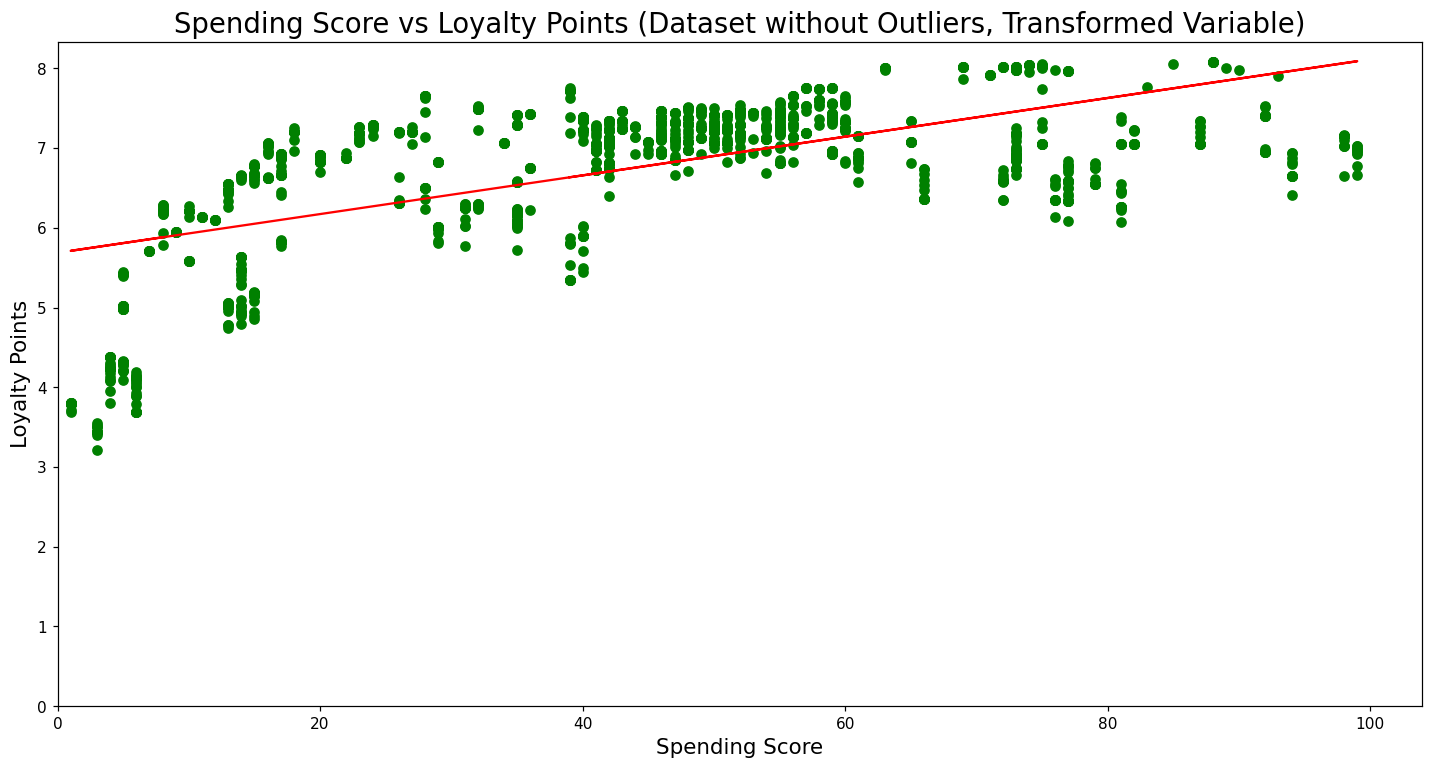

In [46]:
# Plot the graph with a regression line.
plt.figure(figsize=(16, 8), dpi=110)
plt.scatter(x_1_non_out, y_non_out_log, color='green')

# Plot the regression line (in red).
plt.plot(x_1_non_out, y_pred_1_non_out_log, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Label axes and add a title
plt.xlabel('Spending Score', fontsize=14)
plt.ylabel('Loyalty Points', fontsize=14)
plt.title('Spending Score vs Loyalty Points (Dataset without Outliers, Transformed Variable)', fontsize=18)

# View the plot.
plt.show()

In [47]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_1_non_out_log = sms.het_breuschpagan(test_1_non_out_log.resid, test_1_non_out_log.model.exog)

# Print the results of the Breusch-Pagan test.
terms_1_non_out_log = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_1_non_out_log, test_1_non_out_log)))

{'LM stat': 147.5034692060536, 'LM Test p-value': 6.090761368841295e-34, 'F-stat': 161.03155834638628, 'F-test p-value': 2.3924486772289198e-35}


> Since the LM Test p-value is lower than 0.05, we reject the Ho and assume that heteroscedasticity is present.

### 6b) renumeration vs loyalty (full dataset, non-transformed y)

In [48]:
# Independent variable.
x_2 = reviews['remuneration'] 

# Dependent variable.
y = reviews['loyalty_points'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x_2'
test_2 = ols(f, data = reviews).fit()

# Print the regression table.
test_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        12:04:43   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x_2           34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The Durbin-Watson test shows a score of 3.622 and therefore we consider that a negative autocorrelation is a problem in this case.

> However, the p value for the independent variable is 0 and therefore we consider it to be very significant. 

> But looking at the R-squared we see that only a 38% of the variability on the loyalty points is explained by the variability on this independent variable (remuneration).

In [49]:
# Extract the estimated parameters.
print("Parameters: ", test_2.params) 

# Extract the standard errors.
print("Standard errors: ", test_2.bse)    

# Extract the predicted values.
print("Predicted values: ", test_2.predict()) 

Parameters:  Intercept   -65.686513
x_2          34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x_2           0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [50]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_2 = (-65.686513) + (34.187825 * x_2) 

# View the output.
y_pred_2

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

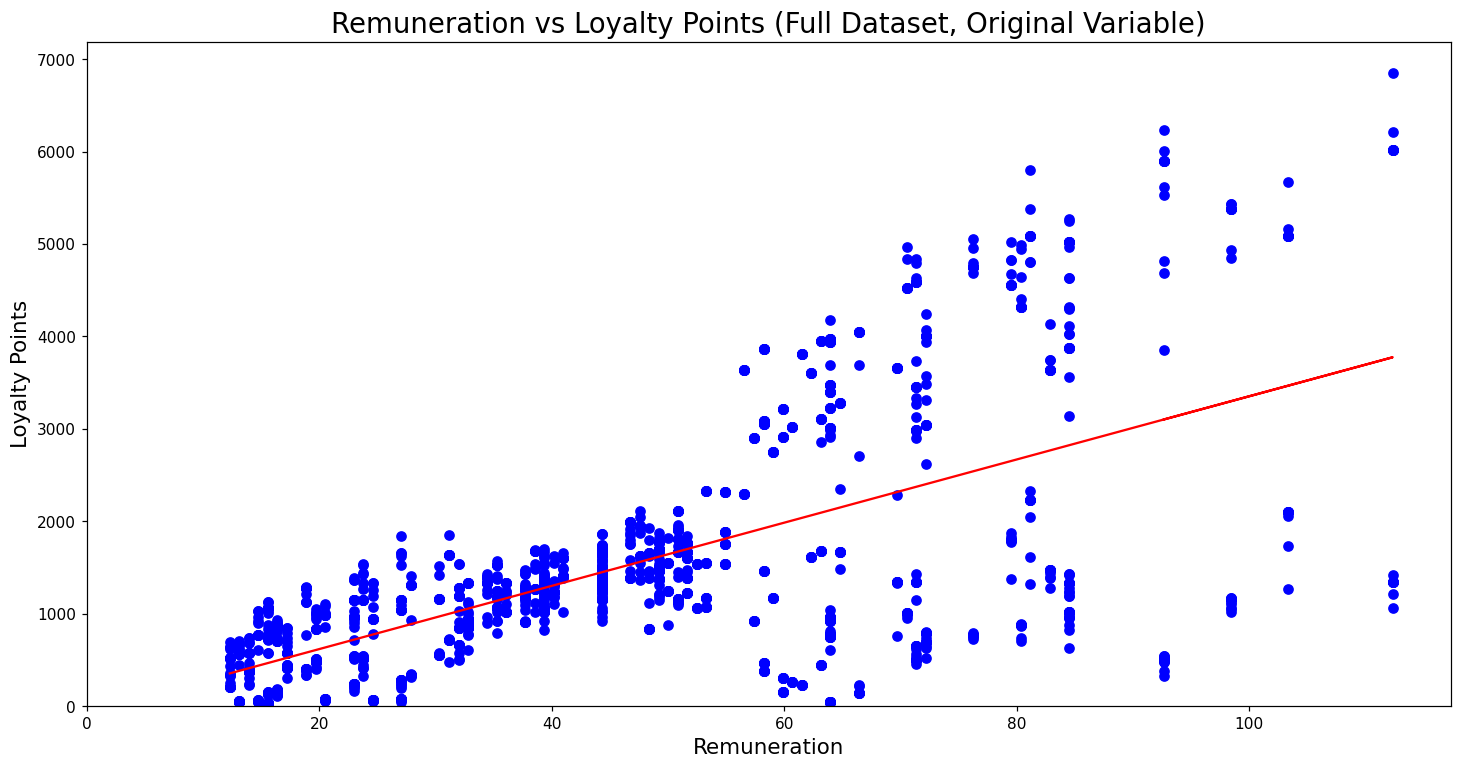

In [51]:
# Plot the graph with a regression line.
plt.figure(figsize=(16, 8), dpi=110)
plt.scatter(x_2, y, color='blue')

# Plot the regression line (in red).
plt.plot(x_2, y_pred_2, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Label axes and add a title
plt.xlabel('Remuneration', fontsize=14)
plt.ylabel('Loyalty Points', fontsize=14)
plt.title('Remuneration vs Loyalty Points (Full Dataset, Original Variable)', fontsize=18)

# View the plot.
plt.show()

In [52]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_2 = sms.het_breuschpagan(test_2.resid, test_2.model.exog)

# Print the results of the Breusch-Pagan test.
terms_2 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_2, test_2)))

{'LM stat': 1038.6445487288283, 'LM Test p-value': 7.153051772822205e-228, 'F-stat': 2158.6311344219334, 'F-test p-value': 3.68e-320}


> Since the LM Test p-value is lower than 0.05, we reject the Ho and assume that heteroscedasticity is present.

### 6b) renumeration vs loyalty (full dataset, transformed y)

In [53]:
# Independent variable.
x_2 = reviews['remuneration'] 

# Dependent variable.
y_log = reviews['log_loyalty_points'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y_log ~ x_2'
test_2_log = ols(f, data = reviews).fit()

# Print the regression table.
test_2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     794.3
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          1.98e-147
Time:                        12:04:43   Log-Likelihood:                -2543.1
No. Observations:                2000   AIC:                             5090.
Df Residuals:                    1998   BIC:                             5101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8505      0.045    131.318      0.000       5.763       5.938
x_2            0.0235      0.001     28.184      0.000       0.022       0.025
==============================================================================
Omnibus:                      610.463   Durbin-Watson:                   2.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1512.287
Skew:                          -1.669   Prob(JB):                         0.00
Kurtosis:                       5.647   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The Durbin-Watson test shows a score of 2.844 and therefore we consider that a negative autocorrelation is a problem in this case, although it shows some improvement from the previous one.

> However, the p value for the independent variable is 0 and therefore we consider it to be very significant. 

> But looking at the R-squared we see that only a 28% of the variability on the loyalty points is explained by the variability on this independent variable (remuneration). It is lower than the previous one (38%).

In [54]:
# Extract the estimated parameters.
print("Parameters: ", test_2_log.params) 

# Extract the standard errors.
print("Standard errors: ", test_2_log.bse)    

# Extract the predicted values.
print("Predicted values: ", test_2_log.predict()) 

Parameters:  Intercept    5.850516
x_2          0.023537
dtype: float64
Standard errors:  Intercept    0.044552
x_2          0.000835
dtype: float64
Predicted values:  [6.14002166 6.14002166 6.15932201 ... 8.0314559  8.16655834 8.0314559 ]


In [55]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_2_log = (5.850516) + (0.023537 * x_2) 

# View the output.
y_pred_2_log

0       6.140021
1       6.140021
2       6.159321
3       6.159321
4       6.178622
          ...   
1995    7.838451
1996    8.031454
1997    8.031454
1998    8.166557
1999    8.031454
Name: remuneration, Length: 2000, dtype: float64

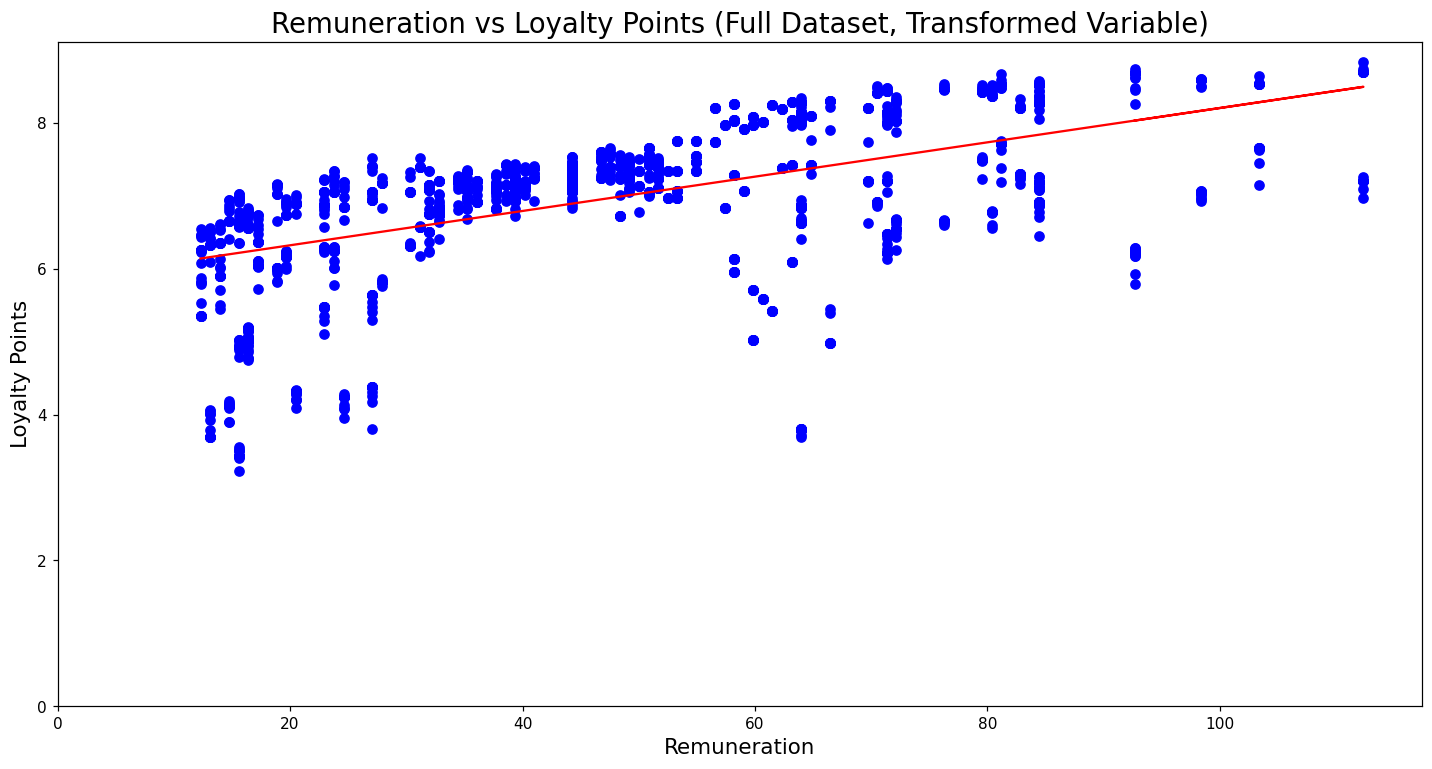

In [56]:
# Plot the graph with a regression line.
plt.figure(figsize=(16, 8), dpi=110)
plt.scatter(x_2, y_log, color='blue')

# Plot the regression line (in red).
plt.plot(x_2, y_pred_2_log, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Label axes and add a title
plt.xlabel('Remuneration', fontsize=14)
plt.ylabel('Loyalty Points', fontsize=14)
plt.title('Remuneration vs Loyalty Points (Full Dataset, Transformed Variable)', fontsize=18)

# View the plot.
plt.show()

In [57]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_2_log = sms.het_breuschpagan(test_2_log.resid, test_2_log.model.exog)

# Print the results of the Breusch-Pagan test.
terms_2_log = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_2_log, test_2_log)))

{'LM stat': 0.04764626018327611, 'LM Test p-value': 0.8272107748018158, 'F-stat': 0.04759974789814739, 'F-test p-value': 0.8273160836310481}


> Since the LM Test p-value is higher than 0.05, we fail to reject the Ho and assume homoscedasticity is present.

> #### This is the first model where the assumption of homoscedasticity is met.

### 6b) renumeration vs loyalty (dataset without outliers, non-transformed y)

In [58]:
# Independent variable.
x_2_non_out = reviews_non_outlier_lp['remuneration'] 

# Dependent variable.
y_non_out = reviews_non_outlier_lp['loyalty_points'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y_non_out ~ x_2_non_out'
test_2_non_out = ols(f, data = reviews_non_outlier_lp).fit()

# Print the regression table.
test_2_non_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_non_out   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     345.3
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           1.99e-70
Time:                        12:04:44   Log-Likelihood:                -13619.
No. Observations:                1734   AIC:                         2.724e+04
Df Residuals:                    1732   BIC:                         2.725e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     578.1120     34.526     16.744      0.000     510.395     645.829
x_2_non_out    13.2294      0.712     18.582      0.000      11.833      14.626
==============================================================================
Omnibus:                       49.776   Durbin-Watson:                   2.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.880
Skew:                           0.352   Prob(JB):                     9.93e-14
Kurtosis:                       3.578   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The Durbin-Watson test shows a score of 2.298 (between the range of 1.5 and 2.5) and therefore we don't consider that autocorrelation is a problem.

> The p value for the independent variable is 0 and therefore we consider it to be very significant. 

> However, looking at the R-squared we see that only a 17% of the variability on the loyalty points is explained by the variability on this independent variable (remuneration), which is very low.

In [59]:
# Extract the estimated parameters.
print("Parameters: ", test_2_non_out.params) 

# Extract the standard errors.
print("Standard errors: ", test_2_non_out.bse)    

# Extract the predicted values.
print("Predicted values: ", test_2_non_out.predict()) 

Parameters:  Intercept      578.112001
x_2_non_out     13.229368
dtype: float64
Standard errors:  Intercept      34.526137
x_2_non_out     0.711940
dtype: float64
Predicted values:  [ 740.83322312  740.83322312  751.68130457 ... 1803.94520553 1879.88177571
 1803.94520553]


In [60]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_2_non_out = (578.112001) + (13.229368 * x_2_non_out) 

# View the output.
y_pred_2_non_out

0        740.833227
1        740.833227
2        751.681309
3        751.681309
4        762.529391
           ...     
1992    1695.464422
1994    1695.464422
1996    1803.945240
1998    1879.881812
1999    1803.945240
Name: remuneration, Length: 1734, dtype: float64

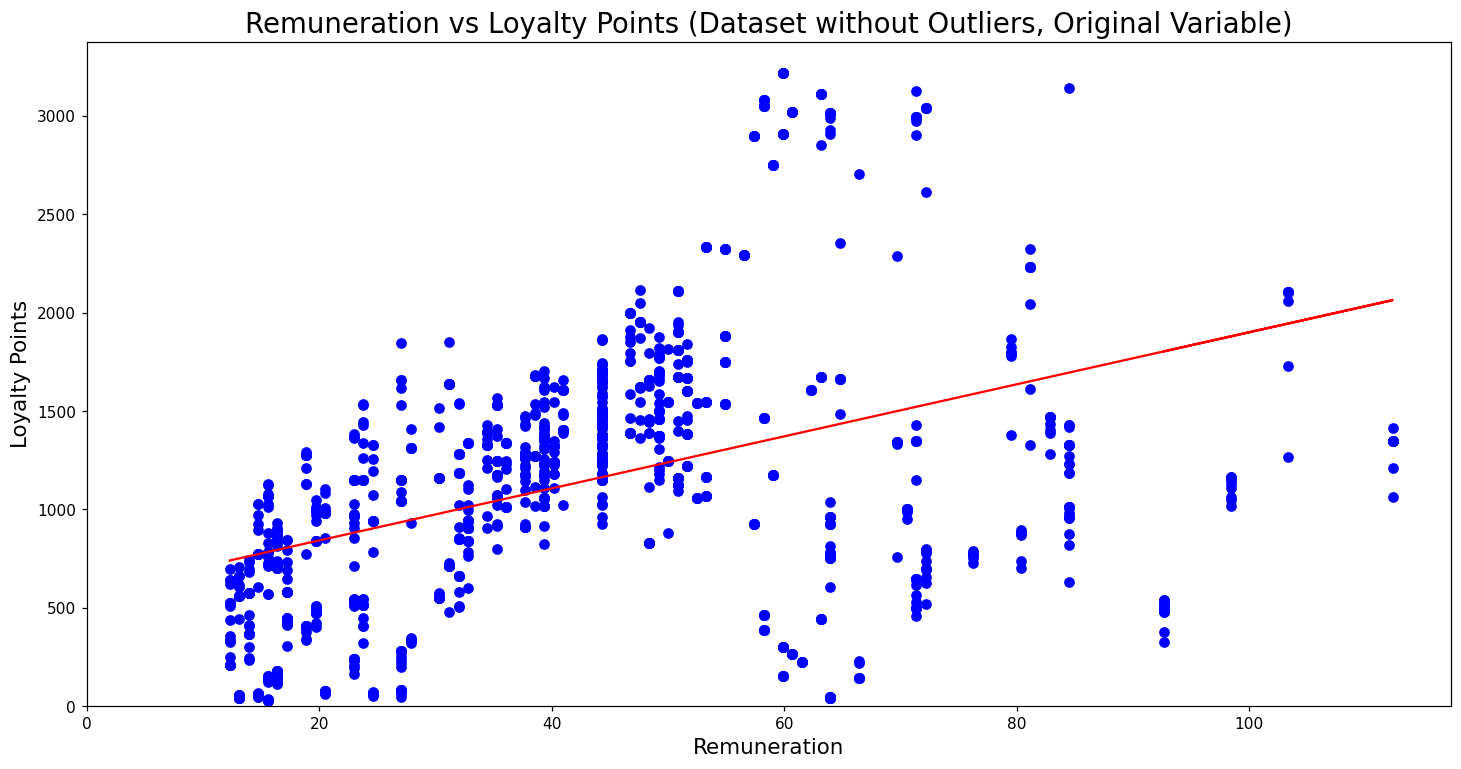

In [61]:
# Plot the graph with a regression line.
plt.figure(figsize=(16, 8), dpi=110)
plt.scatter(x_2_non_out, y_non_out, color='blue')

# Plot the regression line (in red).
plt.plot(x_2_non_out, y_pred_2_non_out, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Label axes and add a title
plt.xlabel('Remuneration', fontsize=14)
plt.ylabel('Loyalty Points', fontsize=14)
plt.title('Remuneration vs Loyalty Points (Dataset without Outliers, Original Variable)', fontsize=18)

# View the plot.
plt.show()

In [62]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_2_non_out = sms.het_breuschpagan(test_2_non_out.resid, test_2_non_out.model.exog)

# Print the results of the Breusch-Pagan test.
terms_2_non_out = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_2_non_out, test_2_non_out)))

{'LM stat': 238.663043207976, 'LM Test p-value': 7.695292040978529e-54, 'F-stat': 276.4356147011931, 'F-test p-value': 1.0451950315189084e-57}


> Since the LM Test p-value is lower than 0.05, we reject the Ho and assume that heteroscedasticity is present.

### 6b) renumeration vs loyalty (dataset without outliers, transformed y)

In [63]:
# Independent variable.
x_2_non_out = reviews_non_outlier_lp['remuneration'] 

# Dependent variable.
y_non_out_log = reviews_non_outlier_lp['log_loyalty_points'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y_non_out_log ~ x_2_non_out'
test_2_non_out_log = ols(f, data = reviews_non_outlier_lp).fit()

# Print the regression table.
test_2_non_out_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          y_non_out_log   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     278.3
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           4.67e-58
Time:                        12:04:44   Log-Likelihood:                -2201.7
No. Observations:                1734   AIC:                             4407.
Df Residuals:                    1732   BIC:                             4418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.0543      0.048    126.931      0.000       5.961       6.148
x_2_non_out     0.0164      0.001     16.682      0.000       0.014       0.018
==============================================================================
Omnibus:                      533.691   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1314.663
Skew:                          -1.682   Prob(JB):                    3.35e-286
Kurtosis:                       5.622   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The Durbin-Watson test shows a score of 2.125 (between the range of 1.5 and 2.5) and therefore we don't consider that autocorrelation is a problem.

> The p value for the independent variable is 0 and therefore we consider it to be very significant. 

> However, looking at the R-squared we see that only a 14% of the variability on the loyalty points is explained by the variability on this independent variable (remuneration), which again is very low.

In [64]:
# Extract the estimated parameters.
print("Parameters: ", test_2_non_out_log.params) 

# Extract the standard errors.
print("Standard errors: ", test_2_non_out_log.bse)    

# Extract the predicted values.
print("Predicted values: ", test_2_non_out_log.predict()) 

Parameters:  Intercept      6.054310
x_2_non_out    0.016408
dtype: float64
Standard errors:  Intercept      0.047698
x_2_non_out    0.000984
dtype: float64
Predicted values:  [6.25612426 6.25612426 6.26957853 ... 7.57464276 7.66882265 7.57464276]


In [65]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_2_non_out_log = (6.054310) + (0.016408 * x_2_non_out) 

# View the output.
y_pred_2_non_out_log

0       6.256128
1       6.256128
2       6.269583
3       6.269583
4       6.283038
          ...   
1992    7.440130
1994    7.440130
1996    7.574675
1998    7.668857
1999    7.574675
Name: remuneration, Length: 1734, dtype: float64

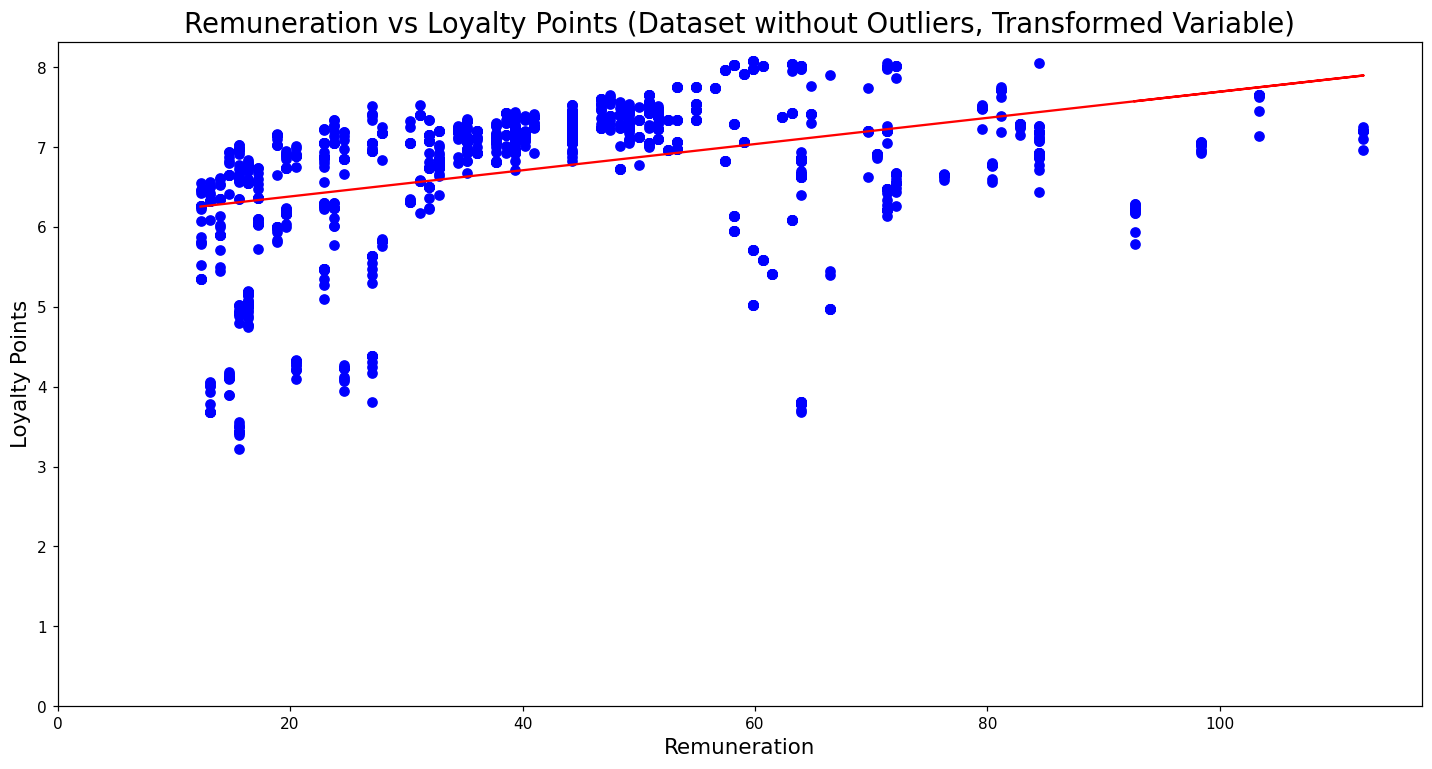

In [66]:
# Plot the graph with a regression line.
plt.figure(figsize=(16, 8), dpi=110)
plt.scatter(x_2_non_out, y_non_out_log, color='blue')

# Plot the regression line (in red).
plt.plot(x_2_non_out, y_pred_2_non_out_log, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Label axes and add a title
plt.xlabel('Remuneration', fontsize=14)
plt.ylabel('Loyalty Points', fontsize=14)
plt.title('Remuneration vs Loyalty Points (Dataset without Outliers, Transformed Variable)', fontsize=18)

# View the plot.
plt.show()

In [67]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_2_non_out_log = sms.het_breuschpagan(test_2_non_out_log.resid, test_2_non_out_log.model.exog)

# Print the results of the Breusch-Pagan test.
terms_2_non_out_log = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_2_non_out_log, test_2_non_out_log)))

{'LM stat': 8.174810119397948, 'LM Test p-value': 0.0042476115483759515, 'F-stat': 8.204058678606206, 'F-test p-value': 0.004230043908502755}


> Since the LM Test p-value is lower than 0.05, we reject the Ho and assume that heteroscedasticity is present.

### 6c) age vs loyalty (full dataset, non-transformed y)

In [68]:
# Independent variable.
x_3 = reviews['age'] 

# Dependent variable.
y = reviews['loyalty_points'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x_3'
test_3 = ols(f, data = reviews).fit()

# Print the regression table.
test_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 21 Apr 2023   Prob (F-statistic):             0.0577
Time:                        12:04:44   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x_3           -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The Durbin-Watson test shows a score of 2.277 (between the range of 1.5 and 2.5) and therefore we don't consider that autocorrelation is a problem.

> However, the p value for the independent variable is just above 0.05 and therefore we can't consider it to be very significant. 

> Also, looking at the R-squared we see that only a 0.2% of the variability on the loyalty points is explained by the variability on this independent variable (age), which is ridiculously low.

In [69]:
# Extract the estimated parameters.
print("Parameters: ", test_3.params) 

# Extract the standard errors.
print("Standard errors: ", test_3.bse)    

# Extract the predicted values.
print("Predicted values: ", test_3.predict()) 

Parameters:  Intercept    1736.517739
x_3            -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x_3           2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [70]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_3 = (1736.517739) + (-4.012805 * x_3) 

# View the output.
y_pred_3

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

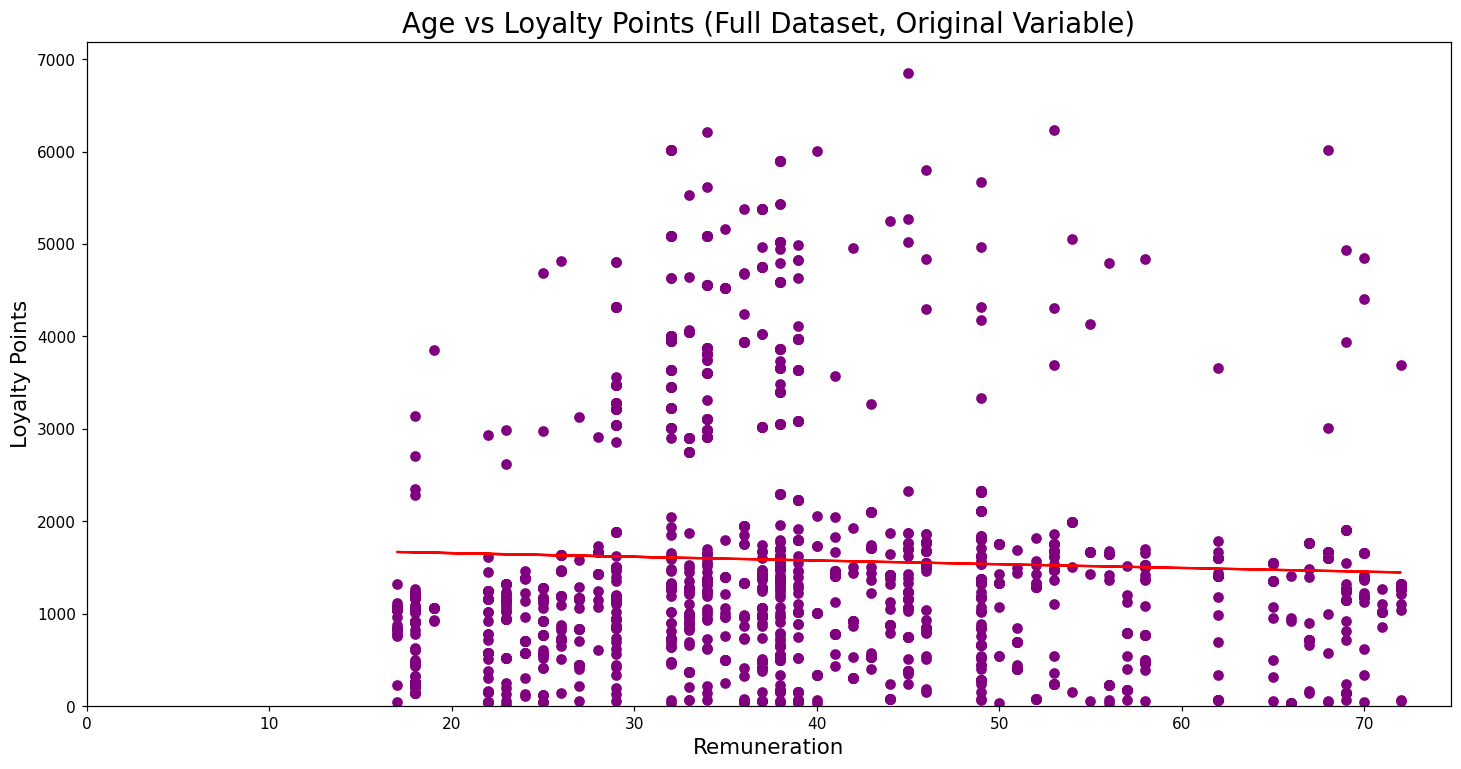

In [71]:
# Plot the graph with a regression line.
plt.figure(figsize=(16, 8), dpi=110)
plt.scatter(x_3, y, color='purple')

# Plot the regression line (in red).
plt.plot(x_3, y_pred_3, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Label axes and add a title
plt.xlabel('Remuneration', fontsize=14)
plt.ylabel('Loyalty Points', fontsize=14)
plt.title('Age vs Loyalty Points (Full Dataset, Original Variable)', fontsize=18)

# View the plot.
plt.show()

In [72]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_3 = sms.het_breuschpagan(test_3.resid, test_3.model.exog)

# Print the results of the Breusch-Pagan test.
terms_3 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_3, test_3)))

{'LM stat': 13.045150861307642, 'LM Test p-value': 0.00030407066519251314, 'F-stat': 13.11766668084642, 'F-test p-value': 0.0002998192355800465}


> Since the LM Test p-value is lower than 0.05, we reject the Ho and assume that heteroscedasticity is present.

### 6c) age vs loyalty (full dataset, transformed y)

In [73]:
# Independent variable.
x_3 = reviews['age'] 

# Dependent variable.
y_log = reviews['log_loyalty_points'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y_log ~ x_3'
test_3_log = ols(f, data = reviews).fit()

# Print the regression table.
test_3_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.393
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.122
Time:                        12:04:44   Log-Likelihood:                -2876.7
No. Observations:                2000   AIC:                             5757.
Df Residuals:                    1998   BIC:                             5769.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0849      0.070    100.926      0.000       6.947       7.223
x_3           -0.0026      0.002     -1.547      0.122      -0.006       0.001
==============================================================================
Omnibus:                      392.087   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              748.718
Skew:                          -1.180   Prob(JB):                    2.62e-163
Kurtosis:                       4.847   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The Durbin-Watson test shows a score of 2.036 (between the range of 1.5 and 2.5) and therefore we don't consider that autocorrelation is a problem.

> However, the p value for the independent variable is above 0.05 and therefore we can't consider it to be significant. 

> Also, looking at the R-squared we see that only a 0.1% of the variability on the loyalty points is explained by the variability on this independent variable (age), which is ridiculously low.

In [74]:
# Extract the estimated parameters.
print("Parameters: ", test_3_log.params) 

# Extract the standard errors.
print("Standard errors: ", test_3_log.bse)    

# Extract the predicted values.
print("Predicted values: ", test_3_log.predict()) 

Parameters:  Intercept    7.084861
x_3         -0.002601
dtype: float64
Standard errors:  Intercept    0.070198
x_3          0.001681
dtype: float64
Predicted values:  [7.03805167 7.02504914 7.02764965 ... 6.99644358 6.99644358 7.00164459]


In [75]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_3_log = (7.084861) + (-0.002601 * x_3) 

# View the output.
y_pred_3_log

0       7.038043
1       7.025038
2       7.027639
3       7.019836
4       6.999028
          ...   
1995    6.988624
1996    6.973018
1997    6.996427
1998    6.996427
1999    7.001629
Name: age, Length: 2000, dtype: float64

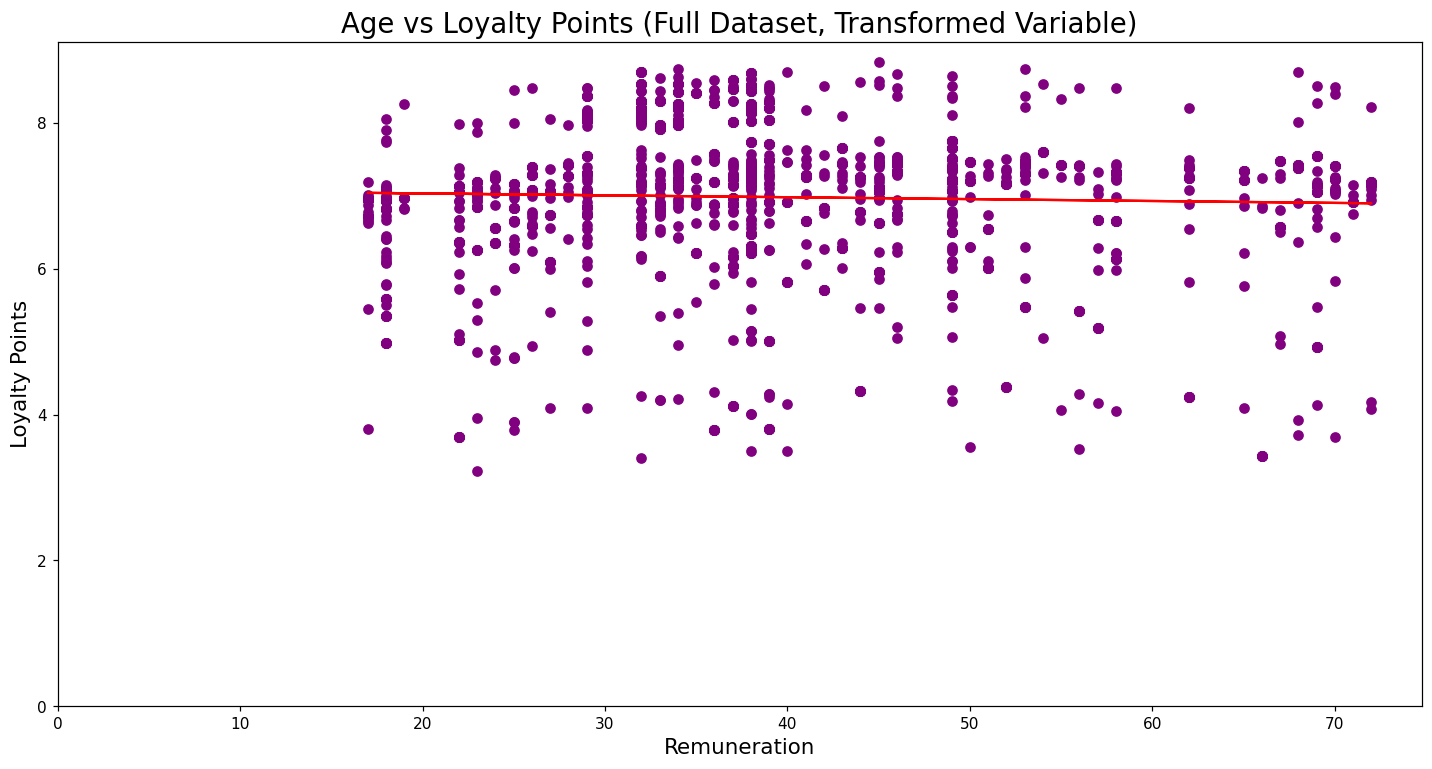

In [76]:
# Plot the graph with a regression line.
plt.figure(figsize=(16, 8), dpi=110)
plt.scatter(x_3, y_log, color='purple')

# Plot the regression line (in red).
plt.plot(x_3, y_pred_3_log, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Label axes and add a title
plt.xlabel('Remuneration', fontsize=14)
plt.ylabel('Loyalty Points', fontsize=14)
plt.title('Age vs Loyalty Points (Full Dataset, Transformed Variable)', fontsize=18)

# View the plot.
plt.show()

In [77]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_3_log = sms.het_breuschpagan(test_3_log.resid, test_3_log.model.exog)

# Print the results of the Breusch-Pagan test.
terms_3_log = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_3_log, test_3_log)))

{'LM stat': 1.9037817803257973, 'LM Test p-value': 0.16765562765439973, 'F-stat': 1.903690103812889, 'F-test p-value': 0.167820242547127}


> Since the LM Test p-value is higher than 0.05, we fail to reject the Ho and assume homoscedasticity is present.

> #### However, even if this model meets the assumption of homoscedasticity, the R-squared is so low that we can't use it.

### 6c) age vs loyalty (dataset without outliers, non-transformed y)

In [78]:
# Independent variable.
x_3_non_out = reviews_non_outlier_lp['age'] 

# Dependent variable.
y_non_out = reviews_non_outlier_lp['loyalty_points'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y_non_out ~ x_3_non_out'
test_3_non_out = ols(f, data = reviews_non_outlier_lp).fit()

# Print the regression table.
test_3_non_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_non_out   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.202
Date:                Fri, 21 Apr 2023   Prob (F-statistic):             0.0737
Time:                        12:04:44   Log-Likelihood:                -13775.
No. Observations:                1734   AIC:                         2.755e+04
Df Residuals:                    1732   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1073.7676     48.861     21.976      0.000     977.935    1169.600
x_3_non_out     2.0617      1.152      1.789      0.074      -0.198       4.322
==============================================================================
Omnibus:                      144.941   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.128
Skew:                           0.692   Prob(JB):                     4.25e-43
Kurtosis:                       3.887   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The Durbin-Watson test shows a score of 1.943 (between the range of 1.5 and 2.5) and therefore we don't consider that autocorrelation is a problem.

> However, the p value for the independent variable is above 0.05 and therefore we can't consider it to be significant. 

> Also, looking at the R-squared we see that only a 0.2% of the variability on the loyalty points is explained by the variability on this independent variable (age), which is ridiculously low again.

In [79]:
# Extract the estimated parameters.
print("Parameters: ", test_3_non_out.params) 

# Extract the standard errors.
print("Standard errors: ", test_3_non_out.bse)    

# Extract the predicted values.
print("Predicted values: ", test_3_non_out.predict()) 

Parameters:  Intercept      1073.767558
x_3_non_out       2.061728
dtype: float64
Standard errors:  Intercept      48.860928
x_3_non_out     1.152190
dtype: float64
Predicted values:  [1110.87867034 1121.1873127  1119.12558423 ... 1162.42188213 1143.86632589
 1139.74286894]


In [80]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_3_non_out = (1073.767558) + (2.061728 * x_3_non_out) 

# View the output.
y_pred_3_non_out

0       1110.878662
1       1121.187302
2       1119.125574
3       1125.310758
4       1141.804582
           ...     
1992    1145.928038
1994    1166.545318
1996    1162.421862
1998    1143.866310
1999    1139.742854
Name: age, Length: 1734, dtype: float64

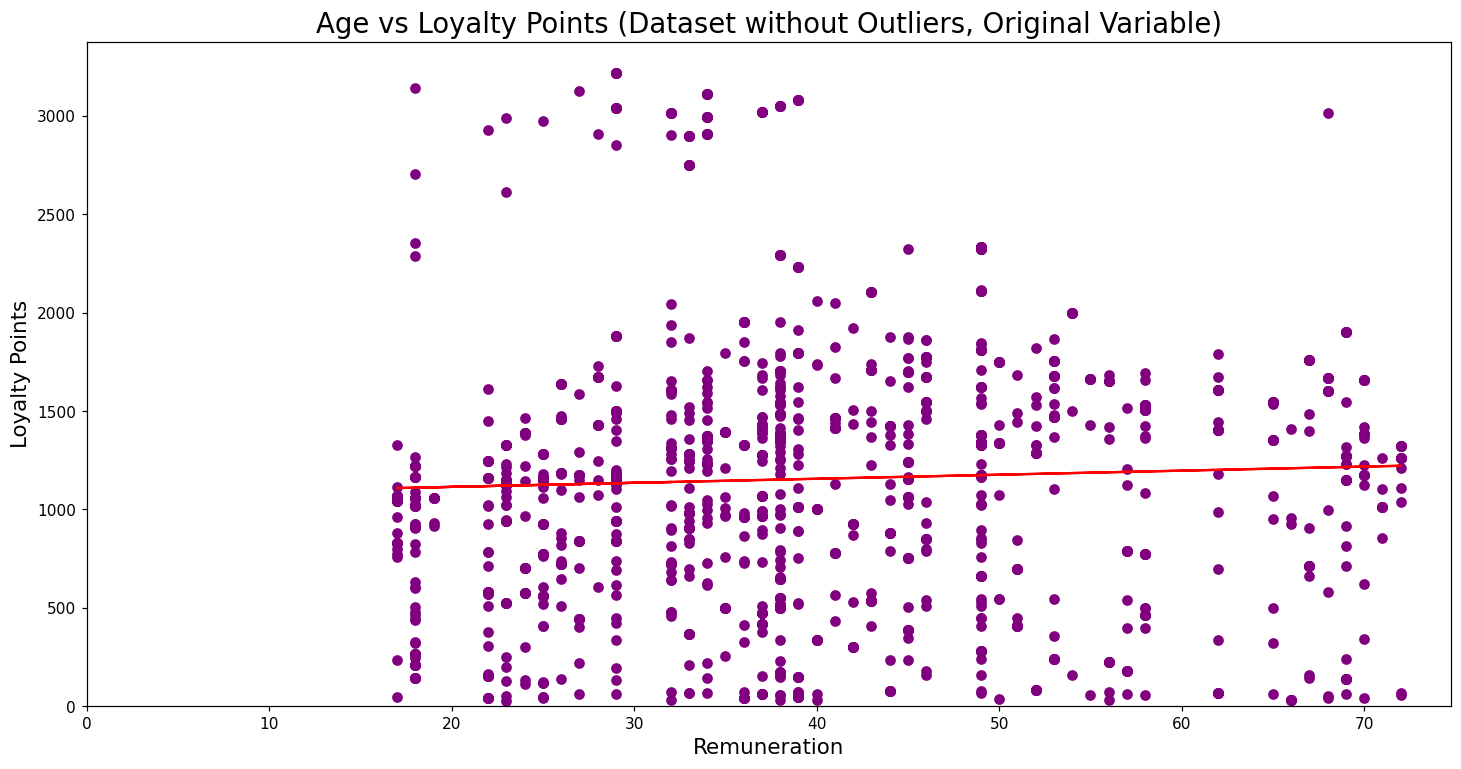

In [81]:
# Plot the graph with a regression line.
plt.figure(figsize=(16, 8), dpi=110)
plt.scatter(x_3_non_out, y_non_out, color='purple')

# Plot the regression line (in red).
plt.plot(x_3_non_out, y_pred_3_non_out, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Label axes and add a title
plt.xlabel('Remuneration', fontsize=14)
plt.ylabel('Loyalty Points', fontsize=14)
plt.title('Age vs Loyalty Points (Dataset without Outliers, Original Variable)', fontsize=18)

# View the plot.
plt.show()

In [82]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_3_non_out = sms.het_breuschpagan(test_3_non_out.resid, test_3_non_out.model.exog)

# Print the results of the Breusch-Pagan test.
terms_3_non_out = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_3_non_out, test_3_non_out)))

{'LM stat': 3.834985106112257, 'LM Test p-value': 0.05019343701782387, 'F-stat': 3.839052429454998, 'F-test p-value': 0.050232010976673624}


> Since the LM Test p-value is higher than 0.05, we fail to reject the Ho and assume homoscedasticity is present.

> #### However, even if this model meets the assumption of homoscedasticity, the R-squared is so low that we can't use it.

### 6c) age vs loyalty (dataset without outliers, transformed y)

In [83]:
# Independent variable.
x_3_non_out = reviews_non_outlier_lp['age'] 

# Dependent variable.
y_non_out_log = reviews_non_outlier_lp['log_loyalty_points'] 

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y_non_out_log ~ x_3_non_out'
test_3_non_out_log = ols(f, data = reviews_non_outlier_lp).fit()

# Print the regression table.
test_3_non_out_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          y_non_out_log   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1652
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.685
Time:                        12:04:44   Log-Likelihood:                -2330.8
No. Observations:                1734   AIC:                             4666.
Df Residuals:                    1732   BIC:                             4676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7458      0.066    101.498      0.000       6.615       6.876
x_3_non_out     0.0006      0.002      0.406      0.685      -0.002       0.004
==============================================================================
Omnibus:                      524.410   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1288.684
Skew:                          -1.651   Prob(JB):                    1.47e-280
Kurtosis:                       5.634   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The Durbin-Watson test shows a score of 1.853 (between the range of 1.5 and 2.5) and therefore we don't consider that autocorrelation is a problem.

> However, the p value for the independent variable is above 0.05 and therefore we can't consider it to be significant. 

> Also, looking at the R-squared we see that NONE of the variability on the loyalty points is explained by the variability on this independent variable (age).

In [84]:
# Extract the estimated parameters.
print("Parameters: ", test_3_non_out_log.params) 

# Extract the standard errors.
print("Standard errors: ", test_3_non_out_log.bse)    

# Extract the predicted values.
print("Predicted values: ", test_3_non_out_log.predict()) 

Parameters:  Intercept      6.745752
x_3_non_out    0.000637
dtype: float64
Standard errors:  Intercept      0.066462
x_3_non_out    0.001567
dtype: float64
Predicted values:  [6.75721661 6.76040114 6.75976424 ... 6.7731393  6.76740713 6.76613331]


In [85]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_3_non_out_log = (6.745752) + (0.000637 * x_3_non_out) 

# View the output.
y_pred_3_non_out_log

0       6.757218
1       6.760403
2       6.759766
3       6.761677
4       6.766773
          ...   
1992    6.768047
1994    6.774417
1996    6.773143
1998    6.767410
1999    6.766136
Name: age, Length: 1734, dtype: float64

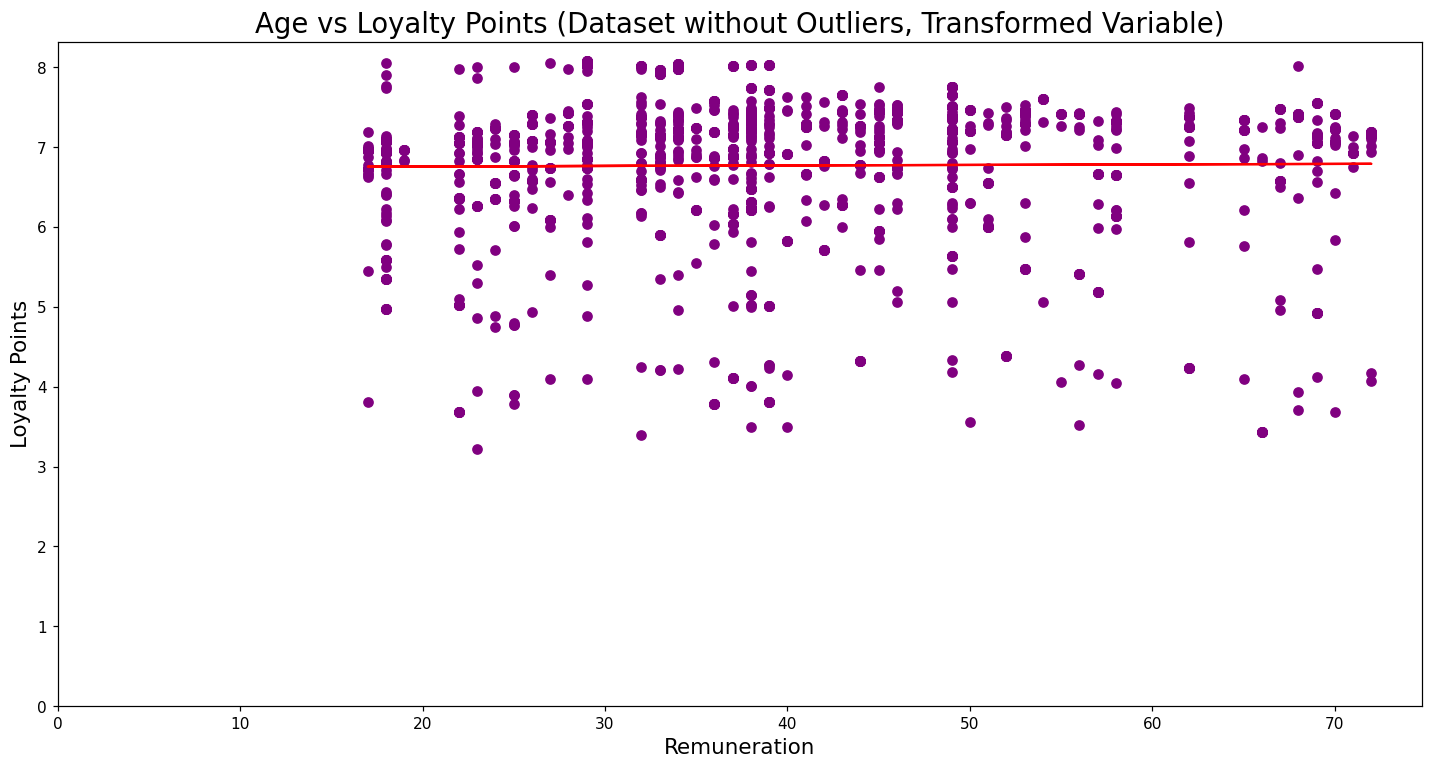

In [86]:
# Plot the graph with a regression line.
plt.figure(figsize=(16, 8), dpi=110)
plt.scatter(x_3_non_out, y_non_out_log, color='purple')

# Plot the regression line (in red).
plt.plot(x_3_non_out, y_pred_3_non_out_log, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Label axes and add a title
plt.xlabel('Remuneration', fontsize=14)
plt.ylabel('Loyalty Points', fontsize=14)
plt.title('Age vs Loyalty Points (Dataset without Outliers, Transformed Variable)', fontsize=18)

# View the plot.
plt.show()

In [87]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_3_non_out_log = sms.het_breuschpagan(test_3_non_out_log.resid, test_3_non_out_log.model.exog)

# Print the results of the Breusch-Pagan test.
terms_3_non_out_log = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_3_non_out_log, test_3_non_out_log)))

{'LM stat': 6.868532872681568, 'LM Test p-value': 0.008772664293237914, 'F-stat': 6.887894269722916, 'F-test p-value': 0.008754431851188176}


> Since the LM Test p-value is lower than 0.05, we reject the Ho and assume that heteroscedasticity is present.

## 7. Observations and insights

***In summary none of the Simple Linear Regression models performs well and we can't draw significant conclusions from them.
We can disregard the variable age, which has no relationship whatsoever with the dependant variable loyalty points.
The other two independent variables don't work very well either, although we see some relationship between these and loyalty points, therefore we are going to try and fit a Multiple Linear Regression model with them to see how it performs.***

## 8. Multiple linear regression

### 8a) Full dataset, non-transformed y

In [88]:
# Define the independent variables.
# We have capital X because we have more than one independent variable. 
X_1 = reviews[['remuneration', 'spending_score']]

# Define the dependent variable.
y_1 = reviews['loyalty_points'] 

In [89]:
# Split the data in 'train' (70%) and 'test' (30%) sets.
X_train_1, X_test_1, y_train_1, y_test_1 = sklearn.model_selection.train_test_split(X_1, y_1,
                                                                                    test_size = 0.30,
                                                                                    random_state = 5)

In [90]:
# Specify the model.
mlr_1 = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr_1.fit(X_train_1, y_train_1)  

# Call the predictions for X in the test set.
y_pred_mlr_1 = mlr_1.predict(X_test_1)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr_1)) 

Prediction for test set: [ 1.43097436e+03  3.37496487e+03  1.67633765e+03  1.59380241e+03
  1.05456379e+03  1.16719797e+03  3.39390962e+03  1.05456379e+03
  3.24837346e+03  2.23791362e+03 -2.02409518e+02  4.73453491e+02
  1.27170824e+02  1.20009994e+03  1.26590389e+03  1.40866597e+03
  1.21593727e+02  1.56090044e+03  3.15412343e+03  2.23791362e+03
  1.65960636e+03  2.08567916e+03  1.45496457e+03 -6.50761742e+02
  4.39100181e+03  2.98403646e+03  3.40172914e+03  1.56202165e+03
 -7.10988593e+02  1.57149402e+03  1.43988613e+03  4.18745226e+03
  1.31719000e+03  3.88242273e+03  1.23244131e+03  1.98248839e+03
 -1.08159482e+02  6.87036016e+02  2.16207669e+03  8.08050323e+02
  1.73042680e+03  9.48598951e+02  1.03001298e+03  1.56090044e+03
 -8.43157093e+02  1.49565710e+03  1.21181474e+03  1.66462285e+03
 -1.05617901e+03  1.60997309e+03  1.53080149e+03 -1.07291030e+03
  3.00690546e+03  1.59769769e+03  2.26123847e+00  1.59436302e+03
  1.40754476e+03  1.20732989e+03  1.40084645e+03  3.92034120e+03


In [91]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model_1 = sm.OLS(y_train_1, sm.add_constant(X_train_1)).fit()

# Call a summary of the model.
print_model_1 = model_1.summary()

# Print the summary.
print(print_model_1)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     3146.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:04:45   Log-Likelihood:                -10756.
No. Observations:                1400   AIC:                         2.152e+04
Df Residuals:                    1397   BIC:                         2.153e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1690.7889     43.409    -38.

> Looking at the OLS Regression results we can conclude that:

> - Prob(F-statistic) is 0, so the model is ok.
> - p-values for both independent variables are 0, and therefore they are both significant.
> - R-squared is 0.818, therefore 82% of the variability on the loyalty points is explained by the variability on the independent variables (remuneration and spending score).
> - The coefficient for remuneration is 33.323, which means that if the remunerartion increases by 1 the loyalty points increases by 33.323. 
> - The coefficient for spending score is 32.9, which means that if the speding score increases by 1 the loyalty points increases by 32.9. 

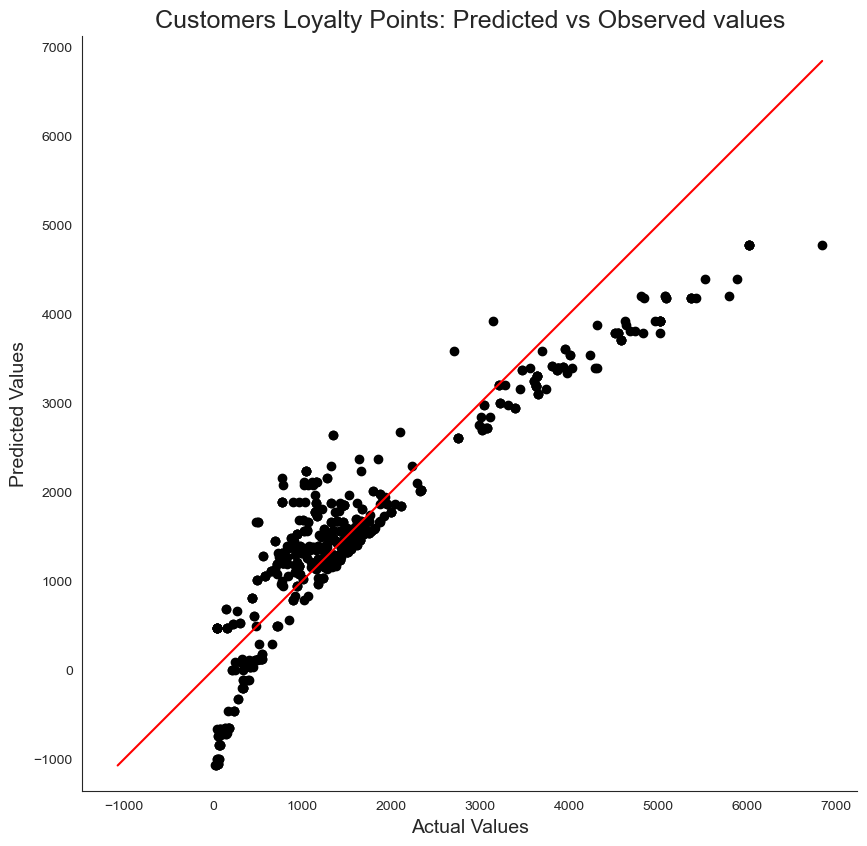

In [92]:
# Plot predicted values against actual values.

# Set the plot style as white.
sns.set_style('white')

# Plot predicted values against actual values.
plt.figure(figsize=(10,10), dpi=100)
plt.scatter(y_test_1, y_pred_mlr_1, c = 'black');
p1 = max(max(y_test_1), max(y_pred_mlr_1));
p2 = min(min(y_test_1), min(y_pred_mlr_1));
plt.plot([p1, p2], [p1, p2], c = 'red')

# Label axes and add a title
plt.xlabel('Actual Values', fontsize = 14);
plt.ylabel('Predicted Values', fontsize = 14);
plt.title('Customers Loyalty Points: Predicted vs Observed values', fontsize=18)
plt.axis('equal');

# Remove the top and right spines from the plot.
sns.despine()

# Save the plot as an image.
plt.savefig('Customers Loyalty Points.jpg');
plt.show();

Text(0.5, 0, 'Spending Score')

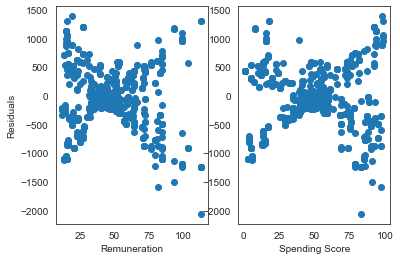

In [93]:
# Plot the residuals.
# Residuals are calcualted
residuals_1 = y_pred_mlr_1 - y_test_1  

# Plot the residuals=(y-predict - y-observe) versus the x-variables.
# Ideally, there should be no pattern in this plot
plt.subplot(1,2,1)
plt.scatter(X_test_1['remuneration'], residuals_1)
plt.xlabel("Remuneration")
plt.ylabel("Residuals")
plt.subplot(1,2,2)
plt.scatter(X_test_1['spending_score'], residuals_1)
plt.xlabel("Spending Score")

> We can see that the points are plotted in a randomly spread, there is no pattern and points are not based on one side so in principle there’s no problem of heteroscedasticity.  

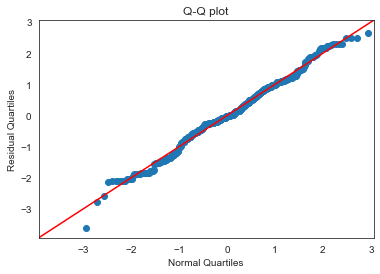

In [94]:
# Plot the quartiles of the residuals versus the normal quartiles.
# The fit=True argument first Standardises the observed data (Residuals) before plotting them.
sm.qqplot(residuals_1, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

> We need the residuals to be as close as possible to the red line, and here we can see a fairly good spread of residuals.

In [95]:
# Check for multicollinearity.
# Add a constant.
x_temp = sm.add_constant(X_train_1)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2)) 

   VIF Factor        features
0        9.54           const
1        1.00    remuneration
2        1.00  spending_score


> The weaker the correlation between the independent variables, then the smaller the VIF would be. And in the best-case scenario, when the two independent variables are uncorrelated (i.e. no collinear relationship between them), the VIF value is one. So in this case, we have no multicollinearity.

In [96]:
# Let's evaluate the model.
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test_1,y_pred_mlr_1))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test_1,y_pred_mlr_1)) 

# Calculate the root mean squared error.
print('Root Mean Square Error (Final):', math.sqrt(metrics.mean_squared_error(y_test_1,y_pred_mlr_1))) 

Mean Absolute Error (Final): 434.9697592789424
Mean Square Error (Final): 308333.55220437545
Root Mean Square Error (Final): 555.2779053810582


> We get high MAE and RMSE values. Even the difference RMSE - MAE = 555.28 - 434.97 = 120.31 is high. Which means that it will be large errors in the forecast. 

### 8b) Full dataset, transformed y

In [97]:
# Define the independent variables.
# We have capital X because we have more than one independent variable. 
X_1 = reviews[['remuneration', 'spending_score']]

# Define the dependent variable.
y_1_log = reviews['log_loyalty_points'] 

In [98]:
# Split the data in 'train' (70%) and 'test' (30%) sets.
X_train_1_log, X_test_1_log, y_train_1_log, y_test_1_log = sklearn.model_selection.train_test_split(X_1, y_1_log,
                                                                                                    test_size = 0.30,
                                                                                                    random_state = 5)

In [99]:
# Specify the model.
mlr_1_log = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr_1_log.fit(X_train_1_log, y_train_1_log)  

# Call the predictions for X in the test set.
y_pred_mlr_1_log = mlr_1_log.predict(X_test_1_log)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr_1_log)) 

Prediction for test set: [6.95018884 8.47125263 7.10195951 7.02237569 6.71022542 6.70856773
 8.37360123 6.71022542 8.34777442 7.65617661 5.6141195  6.02266748
 5.91070959 6.73605222 6.7910212  6.91736905 5.90250464 6.9948912
 8.23003551 7.65617661 7.07734467 7.57865446 7.04824423 5.28923695
 9.17105539 8.08440812 8.46878697 7.0383816  5.24247292 6.9895559
 6.87961794 8.97619831 6.69910909 8.79940881 6.74179151 7.32223941
 5.73185842 6.19044406 7.62828814 6.30571731 7.11877339 6.55433141
 6.59042483 6.9948912  5.11078977 6.96166742 6.77420732 7.06380442
 4.96475839 7.02524533 7.0761327  4.94014355 8.13897311 6.96534504
 5.85246698 7.04412089 6.87387865 6.60024573 6.82218331 8.81335305
 8.72516029 6.99448721 7.28493402 6.77994661 6.94772318 6.7475308
 7.2409979  6.59984174 6.16255558 6.88984283 7.28493402 5.91604489
 8.81335305 8.49340181 7.18441298 6.91078005 5.91851055 8.55164442
 7.30829517 6.70856773 7.26605847 5.90250464 8.30755766 6.71022542
 6.55433141 5.73185842 6.44354374 6.4472

In [100]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model_1_log = sm.OLS(y_train_1_log, sm.add_constant(X_train_1_log)).fit()

# Call a summary of the model.
print_model_1_log = model_1_log.summary()

# Print the summary.
print(print_model_1_log)  

                            OLS Regression Results                            
Dep. Variable:     log_loyalty_points   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2721.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:04:45   Log-Likelihood:                -839.63
No. Observations:                1400   AIC:                             1685.
Df Residuals:                    1397   BIC:                             1701.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4914      0.036    123.

> Looking at the OLS Regression results we can conclude that:

> - Prob(F-statistic) is 0, so the model is ok.
> - p-values for both independent variables are 0, and therefore they are both significant.
> - R-squared is 0.796, therefore 80% of the variability on the loyalty points is explained by the variability on the independent variables (remuneration and spending score). This is slightly lower than the previous model.
> - The coefficient for remuneration is 0.0235, which means that if the remunerartion increases by 1 the loyalty points increases by 0.0235. 
> - The coefficient for spending score is 0.0275, which means that if the speding score increases by 1 the loyalty points increases by 0.0275. 

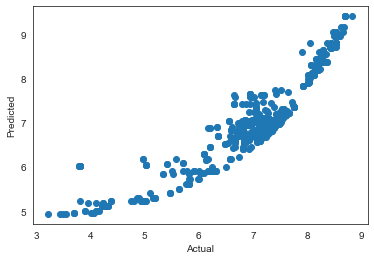

In [101]:
# Plot predicted values against actual values.
plt.scatter(y_test_1_log, y_pred_mlr_1_log);
plt.xlabel('Actual');
plt.ylabel('Predicted');

Text(0.5, 0, 'Spending Score')

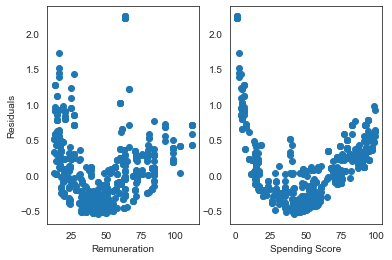

In [102]:
# Plot the residuals.
# Residuals are calcualted
residuals_1_log = y_pred_mlr_1_log - y_test_1_log  

# Plot the residuals=(y-predict - y-observe) versus the x-variables.
# Ideally, there should be no pattern in this plot
plt.subplot(1,2,1)
plt.scatter(X_test_1_log['remuneration'], residuals_1_log)
plt.xlabel("Remuneration")
plt.ylabel("Residuals")
plt.subplot(1,2,2)
plt.scatter(X_test_1_log['spending_score'], residuals_1_log)
plt.xlabel("Spending Score")

> We can see that the points are plotted with a tendency spread: the points are based mostly on one side so we could have an issue of heteroscedasticity.  

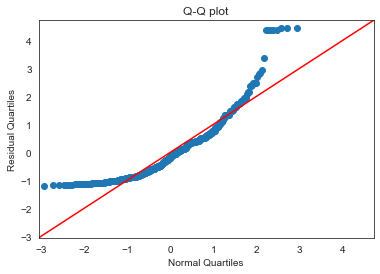

In [103]:
# Plot the quartiles of the residuals versus the normal quartiles.
# The fit=True argument first Standardises the observed data (Residuals) before plotting them.
sm.qqplot(residuals_1_log, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

> We need the residuals to be as close as possible to the red line, and here we can see there are too many outliers.

In [104]:
# Check for multicollinearity.
# Add a constant.
x_temp = sm.add_constant(X_train_1_log)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2)) 

   VIF Factor        features
0        9.54           const
1        1.00    remuneration
2        1.00  spending_score


> The weaker the correlation between the independent variables, then the smaller the VIF would be. And in the best-case scenario, when the two independent variables are uncorrelated (i.e. no collinear relationship between them), the VIF value is one. So in this case, we have no multicollinearity.

In [105]:
# Let's evaluate the model.
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test_1_log, y_pred_mlr_1_log))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test_1_log, y_pred_mlr_1_log)) 

# Calculate the root mean squared error.
print('Root Mean Square Error (Final):', math.sqrt(metrics.mean_squared_error(y_test_1_log, y_pred_mlr_1_log))) 

Mean Absolute Error (Final): 0.3678518367645714
Mean Square Error (Final): 0.24591976846190666
Root Mean Square Error (Final): 0.49590298291289464


> We get very low MAE and RMSE values, but this can be due to the fact that we are working in this case with the log values. Therefore, let's do one more check: take the log of the previos error values and compare them to these values. If they are similar, then we can conclude these values are as bad as the previous ones. If there is a difference, then we could assume these values are effectively better.

In [106]:
# Calculate the log of the previous set of erros values (from 8a).
# Call the ‘metrics.mean_absolute_error’ function.
print('Mean Absolute Error (Final):', np.log(metrics.mean_absolute_error(y_test_1,y_pred_mlr_1)))

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', np.log(metrics.mean_squared_error(y_test_1,y_pred_mlr_1))) 

# Calculate the root mean squared error.
print('Root Mean Square Error (Final):', np.log(math.sqrt(metrics.mean_squared_error(y_test_1,y_pred_mlr_1)))) 


Mean Absolute Error (Final): 6.0752765097731505
Mean Square Error (Final): 12.63893743767823
Root Mean Square Error (Final): 6.319468718839114


> We see the log of the previous error values is bigger than those shown for the transformed dataset and therefore we can assume the transformed dataset erross are effectively better. 

### 8c) Dataset without outliers, non-transformed y

In [107]:
# Define the independent variables.
# We have capital X because we have more than one independent variable. 
X_2 = reviews_non_outlier_lp[['remuneration', 'spending_score']]

# Define the dependent variable.
y_2 = reviews_non_outlier_lp['loyalty_points'] 

In [108]:
# Split the data in 'train' (70%) and 'test' (30%) sets.
X_train_2, X_test_2, y_train_2, y_test_2 = sklearn.model_selection.train_test_split(X_2, y_2,
                                                                                    test_size = 0.30,
                                                                                    random_state = 5)

In [109]:
# Specify the model.
mlr_2 = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr_2.fit(X_train_2, y_train_2)  

# Call the predictions for X in the test set.
y_pred_mlr_2 = mlr_2.predict(X_test_2)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr_2)) 

Prediction for test set: [1711.89956311 1655.85764347 1521.43771942 1137.01327764 1401.89840922
 1056.54695178 1069.10720846 1459.80672392 1283.0653155  1311.20229318
 1055.3867732  1441.20342928 1053.98444957 1253.75804991  109.32230044
 1543.99573057 1441.20342928 1168.17682896 1069.10720846 1736.32396932
 1173.29172405 1850.74838443  891.19551213 1667.48975728 1563.7592038
  722.81749883 2087.25439329 1315.38904541 1114.6873022  1454.45979311
 1211.43656553 1657.24985777 1020.7325768  1055.3867732   529.3290815
 1153.52825083 1374.22550298  722.81749883 -373.7076904  2080.28321246
 -101.14516151 -167.65901639 -101.14516151  624.90805692 1441.435465
 1208.40999189  265.14005706 1069.10720846 1400.73823064 2477.73198236
  403.2826619  1441.20342928  109.32230044 1177.710512   1118.87405443
 2060.97370134 1537.95269261 1311.20229318 1378.4122552  1311.4343289
 1329.80558782 -113.93745391  859.79992509  194.20741424 2087.25439329
  624.90805692  417.23513288  624.90805692 1297.48185791 

In [110]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model_2 = sm.OLS(y_train_2, sm.add_constant(X_train_2)).fit()

# Call a summary of the model.
print_model_2 = model_2.summary()

# Print the summary.
print(print_model_2)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1344.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          4.41e-308
Time:                        12:04:46   Log-Likelihood:                -8936.3
No. Observations:                1213   AIC:                         1.788e+04
Df Residuals:                    1210   BIC:                         1.789e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -794.1785     39.629    -20.

> Looking at the OLS Regression results we can conclude that:

> - Prob(F-statistic) is less than 0, so the model is ok.
> - p-values for both independent variables are 0, and therefore they are both significant.
> - R-squared is 0.69, therefore 69% of the variability on the loyalty points is explained by the variability on the independent variables (remuneration and spending score). This is lower than the previous two MLR models.
> - The coefficient for remuneration is 21.838, which means that if the remunerartion increases by 1 the loyalty points increases by 21.838. 
> - The coefficient for spending score is 22.326, which means that if the speding score increases by 1 the loyalty points increases by 22.326. 

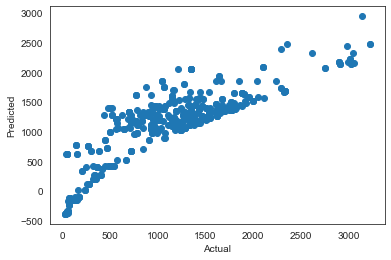

In [111]:
# Plot predicted values against actual values.
plt.scatter(y_test_2, y_pred_mlr_2);
plt.xlabel('Actual');
plt.ylabel('Predicted');

Text(0.5, 0, 'Spending Score')

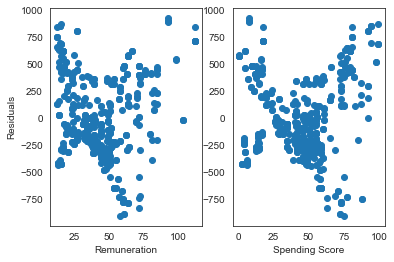

In [112]:
# Plot the residuals.
# Residuals are calcualted
residuals_2 = y_pred_mlr_2 - y_test_2  

# Plot the residuals=(y-predict - y-observe) versus the x-variables.
# Ideally, there should be no pattern in this plot
plt.subplot(1,2,1)
plt.scatter(X_test_2['remuneration'], residuals_2)
plt.xlabel("Remuneration")
plt.ylabel("Residuals")
plt.subplot(1,2,2)
plt.scatter(X_test_2['spending_score'], residuals_2)
plt.xlabel("Spending Score")

> We can see that the points are plotted with a certain tendency spread: the points are based mostly on one side so we could have an issue of heteroscedasticity.  

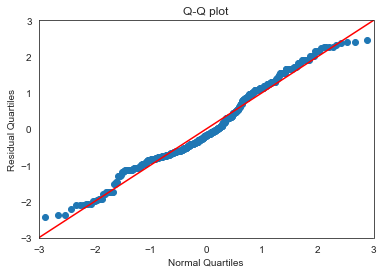

In [113]:
# Plot the quartiles of the residuals versus the normal quartiles.
# The fit=True argument first Standardises the observed data (Residuals) before plotting them.
sm.qqplot(residuals_2, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

> We need the residuals to be as close as possible to the red line, and here we can see a fairly good spread of residuals.

In [114]:
# Check for multicollinearity.
# Add a constant.
x_temp = sm.add_constant(X_train_2)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2)) 

   VIF Factor        features
0       12.95           const
1        1.13    remuneration
2        1.13  spending_score


> The weaker the correlation between the independent variables, then the smaller the VIF would be. And in the best-case scenario, when the two independent variables are uncorrelated (i.e. no collinear relationship between them), the VIF value is one. In this case we have a value very close to one, and therefore we have almost no multicollinearity.

In [115]:
# Let's evaluate the model.
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test_2, y_pred_mlr_2))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test_2, y_pred_mlr_2)) 

# Calculate the root mean squared error.
print('Root Mean Square Error (Final):', math.sqrt(metrics.mean_squared_error(y_test_2, y_pred_mlr_2))) 

Mean Absolute Error (Final): 303.962367063453
Mean Square Error (Final): 139345.90266239602
Root Mean Square Error (Final): 373.29064100563255


> In this case, we get again high MAE and RMSE values. Even the difference RMSE - MAE = 373.29 - 303.99 = 69.3 is high. Which means that it will be large errors in the forecast. 

### 8d) Dataset without outliers, transformed y

In [116]:
# Define the independent variables.
# We have capital X because we have more than one independent variable. 
X_2 = reviews_non_outlier_lp[['remuneration', 'spending_score']]

# Define the dependent variable.
y_2_log = reviews_non_outlier_lp['log_loyalty_points'] 

In [117]:
# Split the data in 'train' (70%) and 'test' (30%) sets.
X_train_2_log, X_test_2_log, y_train_2_log, y_test_2_log = sklearn.model_selection.train_test_split(X_2, y_2_log,
                                                                                                    test_size = 0.30,
                                                                                                    random_state = 5)

In [118]:
# Specify the model.
mlr_2_log = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr_2_log.fit(X_train_2_log, y_train_2_log)  

# Call the predictions for X in the test set.
y_pred_mlr_2_log = mlr_2_log.predict(X_test_2_log)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr_2_log)) 

Prediction for test set: [7.41416832 7.46519493 7.29464502 6.75787438 7.06570838 6.64581002
 6.70910348 7.15745977 7.04038984 7.00879252 6.70665011 7.17041263
 6.53953607 6.89270509 5.3002528  7.31495799 7.17041263 6.80821498
 6.70910348 7.5772593  6.78064073 7.83377019 6.41275149 7.57716047
 7.24116503 6.09775505 7.94524736 7.02989034 6.72539339 7.19720204
 6.94618508 7.39218682 6.59870764 6.70665011 5.89629383 6.85443368
 7.07296966 6.09775505 4.64003464 8.07016576 5.02656832 4.90478931
 5.02656832 5.93780346 7.15824462 6.86424716 5.55195578 6.70910348
 7.12654847 8.64589382 5.76793956 7.17041263 5.3002528  6.78957053
 6.74649121 7.87950053 7.39120432 7.00879252 7.09406748 6.9966245
 6.99583965 4.97544288 6.37457891 5.42124697 7.94524736 5.93780346
 5.75822491 5.93780346 7.00633915 5.75822491 7.51553553 7.12654847
 4.64003464 6.85531736 4.90478931 6.87729886 7.66665615 6.86424716
 6.97061994 4.81951435 5.76793956 7.04294203 7.17041263 7.06973144
 7.87950053 6.7133242  7.38315819 6.86

In [119]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model_2_log = sm.OLS(y_train_2_log, sm.add_constant(X_train_2_log)).fit()

# Call a summary of the model.
print_model_2_log = model_2_log.summary()

# Print the summary.
print(print_model_2_log)  

                            OLS Regression Results                            
Dep. Variable:     log_loyalty_points   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1937.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:04:46   Log-Likelihood:                -746.75
No. Observations:                1213   AIC:                             1500.
Df Residuals:                    1210   BIC:                             1515.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.0683      0.046     87.

> Looking at the OLS Regression results we can conclude that:

> - Prob(F-statistic) is 0, so the model is ok.
> - p-values for both independent variables are 0, and therefore they are both significant.
> - R-squared is 0.76, therefore 76% of the variability on the loyalty points is explained by the variability on the independent variables (remuneration and spending score). This is lower than the first two MLR models, but better than the third one.
> - The coefficient for remuneration is 0.0287, which means that if the remunerartion increases by 1 the loyalty points increases by 0.0287. 
> - The coefficient for spending score is 0.0325, which means that if the speding score increases by 1 the loyalty points increases by 0.0325. 

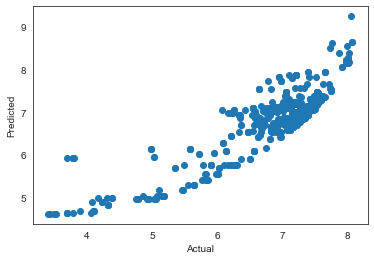

In [120]:
# Plot predicted values against actual values.
plt.scatter(y_test_2_log, y_pred_mlr_2_log);
plt.xlabel('Actual');
plt.ylabel('Predicted');

Text(0.5, 0, 'Spending Score')

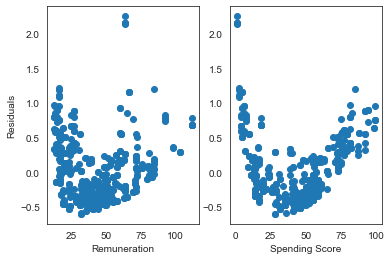

In [121]:
# Plot the residuals.
# Residuals are calcualted
residuals_2_log = y_pred_mlr_2_log - y_test_2_log  

# Plot the residuals=(y-predict - y-observe) versus the x-variables.
# Ideally, there should be no pattern in this plot
plt.subplot(1,2,1)
plt.scatter(X_test_2_log['remuneration'], residuals_2_log)
plt.xlabel("Remuneration")
plt.ylabel("Residuals")
plt.subplot(1,2,2)
plt.scatter(X_test_2_log['spending_score'], residuals_2_log)
plt.xlabel("Spending Score")

> We can see that the points are plotted with a tendency spread, the points are based mostly on one side so we could have an issue of heteroscedasticity.  

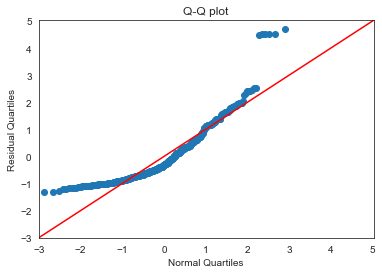

In [122]:
# Plot the quartiles of the residuals versus the normal quartiles.
# The fit=True argument first Standardises the observed data (Residuals) before plotting them.
sm.qqplot(residuals_2_log, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

> We need the residuals to be as close as possible to the red line, and here we can see there are too many outliers.

In [123]:
# Check for multicollinearity.
# Add a constant.
x_temp = sm.add_constant(X_train_2)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2)) 

   VIF Factor        features
0       12.95           const
1        1.13    remuneration
2        1.13  spending_score


> The weaker the correlation between the independent variables, then the smaller the VIF would be. And in the best-case scenario, when the two independent variables are uncorrelated (i.e. no collinear relationship between them), the VIF value is one. In this case we have a value very close to one, and therefore we have almost no multicollinearity.

In [124]:
# Let's evaluate the model.
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test_2_log, y_pred_mlr_2_log))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test_2_log, y_pred_mlr_2_log)) 

# Calculate the root mean squared error.
print('Root Mean Square Error (Final):', math.sqrt(metrics.mean_squared_error(y_test_2_log, y_pred_mlr_2_log))) 

Mean Absolute Error (Final): 0.36696458340632987
Mean Square Error (Final): 0.2242279039308806
Root Mean Square Error (Final): 0.4735270889092625


> In this case we get smaller error values but the Rsquared is also lower, and therefore we would keep the one with the whole dataset.

## 9. Observations and insights

***In summary all the Multiple Linear Regression models perform much better than the Simple Linear Regression models.
From the four MLR models we have fitted, the first one gives us the better Rsquared, with the full dataset (i.e. not removing outliers) and the original dependant variable (i.e. not transformed with the log function). However, the second one with the full dataset and the transformed dependant variable, gives us a similar Rsquared and better error values. BUT! The plot of the residuals is telling us that there is probably an issue with heteroscedasticity. And therefore we will keep the first model and assume the errors could be high.***

***However we need to be mindful that the first model doesn't comply with the assumptions for linear regression (we are keeping the full data set with outliers and we haven't transformed the y variable to improve the normality), therefore we can't trust the reliability of this model 100%.***

# 

# Question 2: how groups within the customer base can be used to target specific market segments.

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. We have been tasked to identify groups within the customer base that can be used to target specific market segments. 

## Steps we will follow:
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using the selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.
7. Observations and insights.

## 1. Prepare the data for clustering

In [125]:
# Import necessary libraries.
# We know some of these libraries were imported for the previous exercise, but we are keeping them here in case someone would 
# like to run this exercise separately.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [126]:
# Load the CSV file(s) as df2.
df2 = reviews[['remuneration', 'spending_score']]

# View DataFrame.
print(df2.shape)
df2.head()

(2000, 2)


remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [127]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [128]:
# Descriptive statistics.
df2.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot the remuneration vs spending score

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

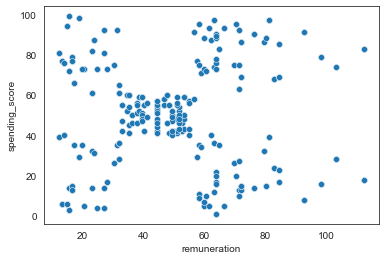

In [129]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

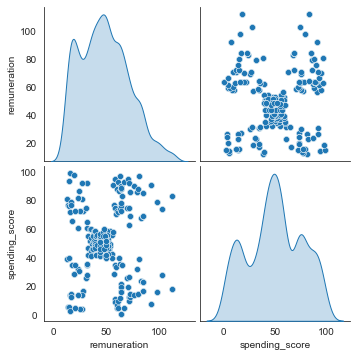

In [130]:
# Create a pairplot with Seaborn.
sns.pairplot(df2,
             diag_kind='kde')

> Just looking at the plots we can see 5 different areas, which could be the number of clusters we end up with: one in the center of the plot, and another 4 areas distributed to the top-left, top-right, bottom-left and bottom-right of the central one.

## 3. Elbow and silhoutte methods

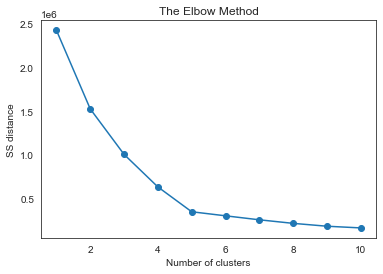

In [131]:
# Determine the number of clusters: Elbow method.
ss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

> It feels that 5 is the optimal number of clusters as this is the point where the diagram starts to get flat.

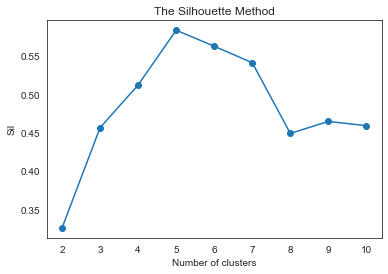

In [132]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

> The silhouette method tells us the same as the elbow method and it seems that 5 clusters is the optimal number. Here we can see that 5 is the peak of the diagram.

## 4. Evaluate k-means model at different values of *k*

### 4a) k=4

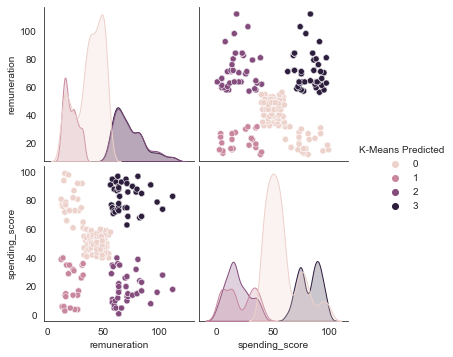

In [133]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [134]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [135]:
# Create a user-defined function to calculate Within Cluster Sums of Squares (WSS) and Between Cluster Sums of Squares (BSS). 
def calc_ssq(x):
    ## Within ssq
    wth_sq = x.groupby('K-Means Predicted').agg([np.var, np.size])
    clust_size = wth_sq['remuneration']["size"]
    wth_sq_agg = (wth_sq['remuneration']["var"] * clust_size).sum() + (wth_sq['spending_score']["var"] * clust_size).sum()
    ## Between ssq
    bet_sq = x.groupby('K-Means Predicted').agg(np.mean)
    glob_mean = x[['remuneration', 'spending_score']].agg(np.mean).to_numpy()
    bet_sq_agg = np.sum(bet_sq.apply(lambda x: np.sum((np.array(x) - glob_mean) ** 2), axis = 1) * clust_size)
    ## Tot sq
    tot_sq = x[['remuneration', 'spending_score']].agg(np.var).sum()
    tot_sq_agg = tot_sq * len(x.index)
    return({"Within": wth_sq_agg, "Between": bet_sq_agg, "Total": tot_sq_agg})

In [136]:
# Calculate WSS and BSS for k=4.
calc_ssq(df2)

{'Within': 634525.7354577936,
 'Between': 1796701.027302297,
 'Total': 2431304.2471563877}

### 4b) k=5

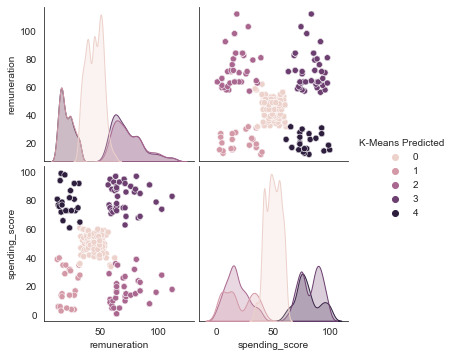

In [137]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [138]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [139]:
# Calculate WSS and BSS for k=5.
calc_ssq(df2)

{'Within': 349481.45481172984,
 'Between': 2081581.2382130716,
 'Total': 2431304.2471563877}

### 4c) k=6

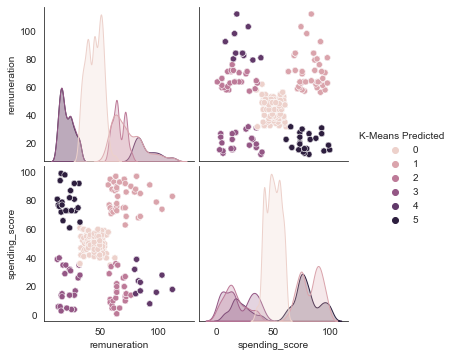

In [140]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [141]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [142]:
# Calculate WSS and BSS for k=6.
calc_ssq(df2)

{'Within': 303091.3463161574,
 'Between': 2127991.7770504802,
 'Total': 2431304.2471563877}

## 5. Fit final model and justify the choice

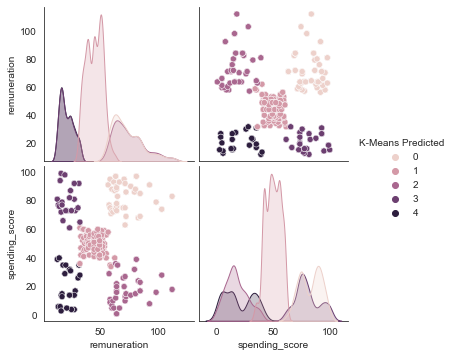

In [143]:
# Apply the final model.
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [144]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

> We choose k=5 as it fits the data better than the other two, and relates to the conclusions drew from both the elbow and the silhouette methods.

> Within Cluster Sums of Squares (WSS) and Between Cluster Sums of Squares (BSS). 
> - WSS means the sum of distances between the points and the corresponding centroids for each cluster
> - BSS means the sum of distances between the centroids and the total sample mean multiplied by the number of points within each cluster. 

> So you can consider WSS as the measure of compactness and BSS as the measure of separation. ***For clustering to be successful, we need to get the lower WSS and the higher BSS.***

> In this case, `k=6` has a lower WSS and higher BSS, which contradict what was predicted by both the Elbow and the Silhouette methods.

> However, for this business case `k=5` makes a better sense due to the practicality of these groups. We can recommend to the marketing team strategies that will fit better with these groups.

## 6. Plot and interpret the clusters

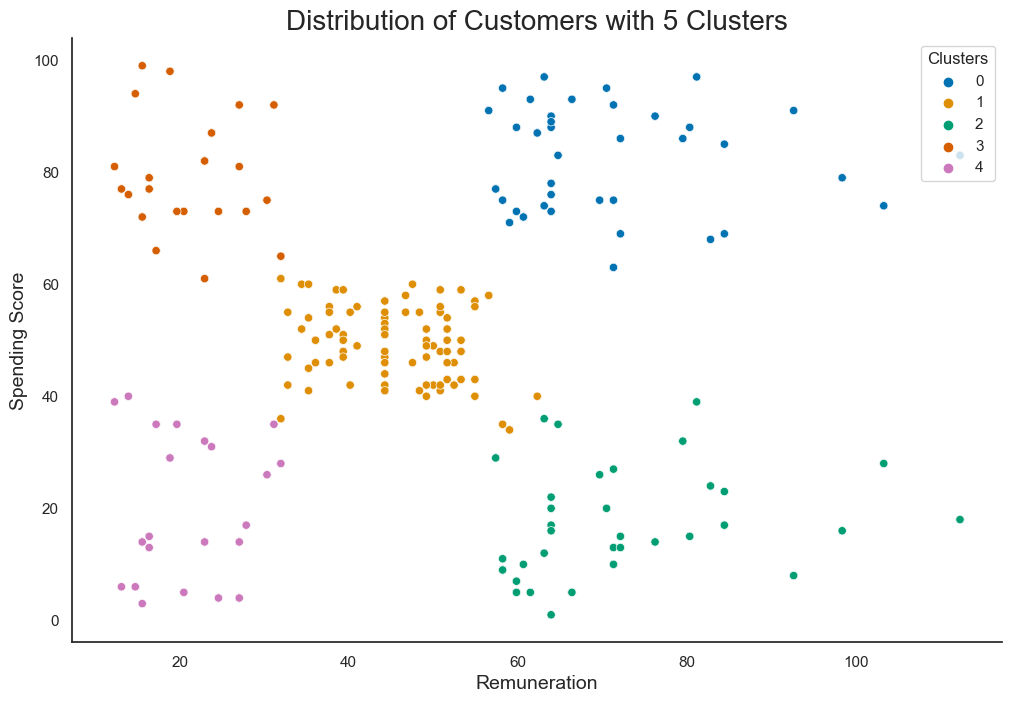

In [145]:
# Visualising the clusters.

# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Set the plot style as white.
sns.set_style('white')

# Create a scatterplot.
fig, ax = plt.subplots(dpi=100)
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2,
                hue='K-Means Predicted',
                palette='colorblind')

# Label axes and add a title
plt.xlabel('Remuneration', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.title('Distribution of Customers with 5 Clusters', fontsize=20)

# Edit the legend
plt.legend(loc='upper right', title='Clusters')

# Remove the top and right spines from the plot.
sns.despine()

plt.show()
fig.savefig('Distribution of Customers with 5 Clusters.jpg')

In [146]:
# View the DataFrame.
df2.head()

remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4

## 7. Observations and insights

***It feels 5 clusters work well with the data distribution as there were 5 areas on the original scatterplot.
This works well with the practicality of these groups as the marketing team can collect the data of these customers and apply different marketing strategies to each group:***

***1. low remuneration with low spending score***

***2. low remuneration with high spending score***

***3. medium remuneration with medium spending score***

***4. high remuneration with low spending score***

***5. high remuneration with high spending score***

***After this explanation, we can clearly see that k=6 wouldn't work as well as 5, and will make customer segmentation too complicated for Turtle games.*** 

# 

# Question 3: how social data can be used to inform marketing campaigns.
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, we need to apply NLP on the data set.

## Steps we will follow:
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. We only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Observations and insights.

## 1. Load and explore the data

In [147]:
# Import necessary libraries.
# We know some of these libraries were imported for the previous exercise, but we are keeping them here in case someone would 
# like to run this exercise separately.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [148]:
# Load the data set as df3, keep necessary columns.
df3 = reviews[['review', 'summary']]

# View DataFrame.
print(df3.shape)
df3.head()

(2000, 2)


review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [149]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [150]:
# Determine if there are any missing values.
df3.isnull().sum()

review     0
summary    0
dtype: int64

> There are no missing values, as already seen in the previous step applying the function info().

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [151]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [152]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [153]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [154]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [155]:
# Check the number of duplicate values in the COMMENTS column.
df3[['review', 'summary']].duplicated().sum()

39

> We have checked the file in Excel and there are no real duplicates if you look at these one by one. The customers are not the same, it just happens that some customers have used the words "love it" or "very cute" to give a product review, but these were done by different customers and for different products, so we are not going to drop the duplicates.

<img align="centre" width="1000" height="800" src="AnguilVanier_Alejandra_DA301_Assignment_Duplicates (week 3).png">

In [156]:
# Drop duplicates in both columns.
#df3 = df3.drop_duplicates(ignore_index=True)

# View DataFrame.
#print(df3.shape)
#df3.head()

## 3. Tokenise and create wordclouds

In [157]:
# Create new DataFrame (copy DataFrame).
df3_token = df3

# View DataFrame.
print(df3_token.shape)
df3_token.head()

(2000, 2)


review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [158]:
# Apply tokenisation to both columns.
df3_token['review_tokens'] = df3_token['review'].apply(word_tokenize)
df3_token['summary_tokens'] = df3_token['summary'].apply(word_tokenize)

# View DataFrame.
print(df3_token.shape)
df3_token.head()

(2000, 4)


review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       review_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      summary_tokens  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [159]:
# Review: String all the comments together in a single variable.
# Create an empty string variable.
review_tokens_string = ''
for i in range(df3_token.shape[0]):
    # Add each comment.
    review_tokens_string = review_tokens_string + df3_token['review'][i]

In [160]:
# Review: Create a word cloud.
wordcloud_review = WordCloud(width = 1600, height = 900, 
                             background_color ='white',
                             colormap='plasma',
                             stopwords = 'none',
                             min_font_size = 10,
                             collocations=False).generate(review_tokens_string) 

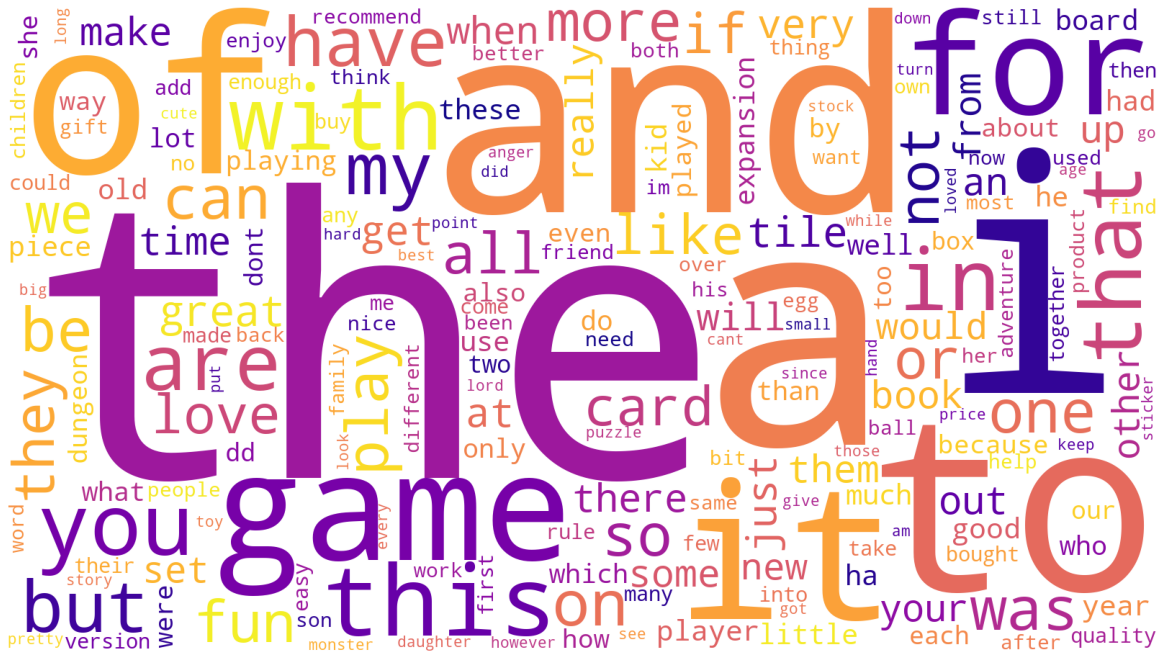

In [161]:
# Review: Plot the WordCloud image.                      
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()
wordcloud_review.to_file('Review - original WordCloud.jpg')

In [162]:
# Summary: String all the comments together in a single variable.
# Create an empty string variable.
summary_tokens_string = ''
for i in range(df3_token.shape[0]):
    # Add each comment.
    summary_tokens_string = summary_tokens_string + df3_token['summary'][i] + ' '

In [163]:
summary_tokens_string

'the fact that 50 of this space is wasted on art and not terribly informative or needed art  another worthless dungeon masters screen from galeforce9 pretty but also pretty useless five stars money trap five stars best gm screen ever five stars great but could be even better another missed opportunity not a value add to the product line five stars love the map not a general dm screen very weak game fell completely flat five stars good book buckley was a card mommer very advanced but as good as it gets you better know what youre getting into dont bother the worst value ive ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures five stars wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great ive done one and gave it to a  great buy cant wait to work on this book stained glass perfection four stars so beautiful great pictures very nice five stars f

In [164]:
# Summary: Create a word cloud.
wordcloud_summary = WordCloud(width = 1600, height = 900, 
                              background_color ='white',
                              colormap='plasma',
                              stopwords = 'none',
                              min_font_size = 10,
                              collocations=False).generate(summary_tokens_string) 

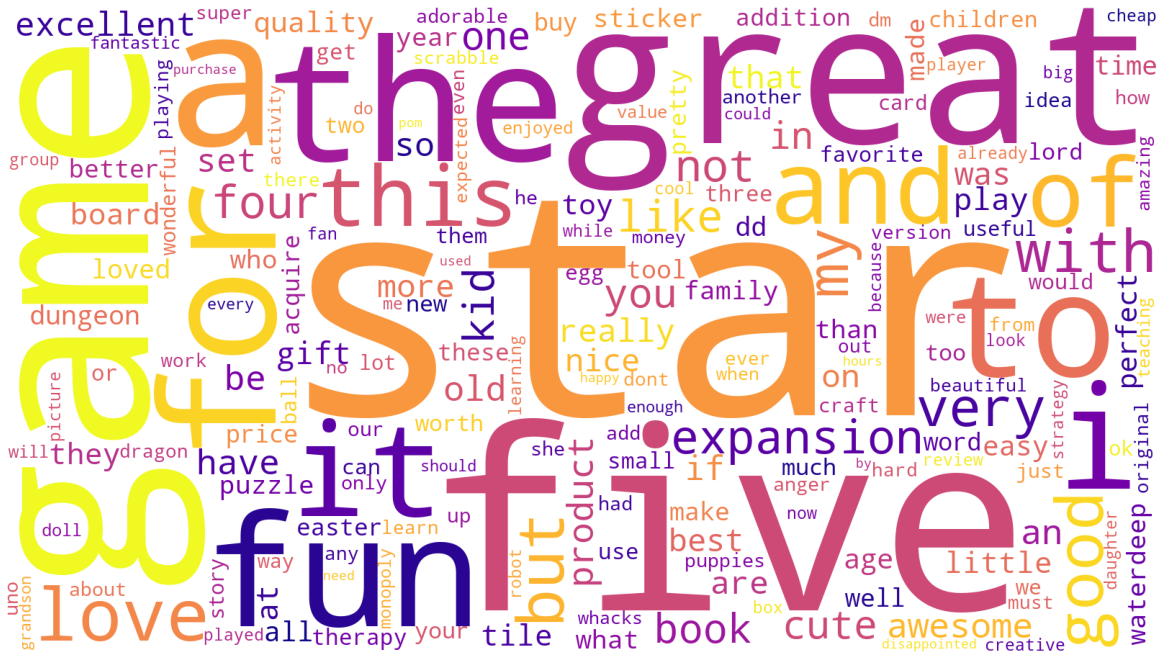

In [165]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()
wordcloud_summary.to_file('Summary - original WordCloud.jpg')

## 4. Frequency distribution 
### 4a) Create frequency distribution

In [166]:
# Determine the frequency distribution.
# Define an empty list of tokens for review.
review_tokens_list = []

for i in range(df3_token.shape[0]):
    # Add each token to the list.
    review_tokens_list = review_tokens_list + df3_token['review_tokens'][i]

In [167]:
# Calculate the frequency distribution for review.
fdist_review = FreqDist(review_tokens_list)

# Preview data.
fdist_review

FreqDist({'the': 5452, 'and': 3234, 'to': 3164, 'a': 3161, 'of': 2488, 'i': 2091, 'it': 2090, 'is': 1782, 'this': 1776, 'game': 1685, ...})

In [168]:
# Define an empty list of tokens for summary.
summary_tokens_list = []

for i in range(df3_token.shape[0]):
    # Add each token to the list.
    summary_tokens_list = summary_tokens_list + df3_token['summary_tokens'][i]

In [169]:
# Calculate the frequency distribution for summary.
fdist_summary = FreqDist(summary_tokens_list)

# Preview data.
fdist_summary

FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [170]:
# Delete all the alpanum.
tokens_review = [word for word in review_tokens_list if word.isalnum()]
tokens_summary = [word for word in summary_tokens_list if word.isalnum()]

In [171]:
# Remove all the stopwords.

# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_review2 = [x for x in tokens_review if x.lower() not in english_stopwords]
tokens_summary2 = [x for x in tokens_summary if x.lower() not in english_stopwords]

# Define an empty string variable for review.
tokens_review2_string = ''

for value in tokens_review2:
    # Add each filtered token word to the string.
    tokens_review2_string = tokens_review2_string + value + ' '
    
# Define an empty string variable for summary.
tokens_summary2_string = ''

for value in tokens_summary2:
    # Add each filtered token word to the string.
    tokens_summary2_string = tokens_summary2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a_van\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

In [172]:
# Create a wordcloud without stop words for review.
# Create a WordCloud.
wordcloud_review2 = WordCloud(width = 1600, height = 900, 
                              background_color ='white',
                              colormap='plasma',
                              min_font_size = 10,
                              collocations=False).generate(tokens_review2_string) 

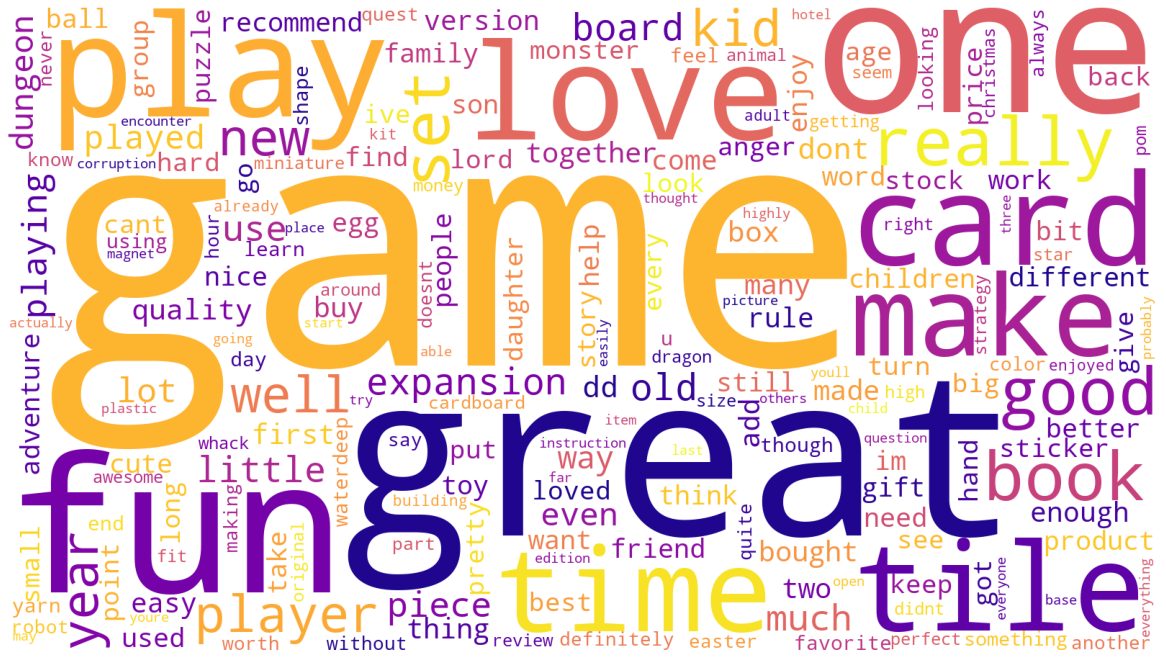

In [173]:
# Plot the wordcloud image.                       
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()
wordcloud_review2.to_file('Review - cleaned WordCloud.jpg')

In [174]:
# Create a wordcloud without stop words for summary.
# Create a WordCloud.
wordcloud_summary2 = WordCloud(width = 1600, height = 900, 
                               background_color ='white', 
                               colormap='plasma', 
                               min_font_size = 10,
                               collocations=False).generate(tokens_summary2_string) 

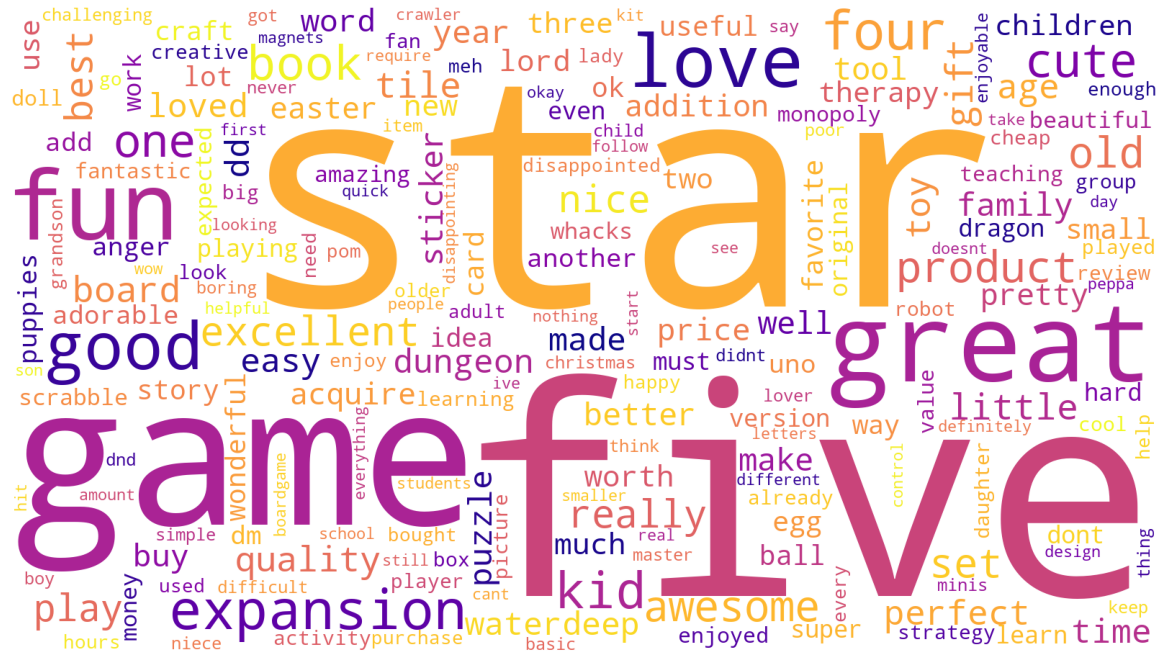

In [175]:
# Plot the wordcloud image.                       
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summary2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()
wordcloud_summary2.to_file('Summary - cleaned WordCloud.jpg')

### 4d) Identify 15 most common words 

In [176]:
# View the frequency distribution for review.
fdist_review2 = FreqDist(tokens_review2)

# Preview the data.
fdist_review2

FreqDist({'game': 1685, 'great': 596, 'fun': 553, 'one': 530, 'play': 502, 'like': 414, 'love': 331, 'really': 319, 'get': 319, 'cards': 301, ...})

In [177]:
# View the frequency distribution for summary.
fdist_summary2 = FreqDist(tokens_summary2)

# Preview the data.
fdist_summary2

FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [178]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter for review.
counts_review = pd.DataFrame(Counter(tokens_review2).most_common(15),
                             columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

Frequency
Word             
game         1685
great         596
fun           553
one           530
play          502
like          414
love          331
really        319
get           319
cards         301
tiles         297
good          294
time          291
would         280
book          273

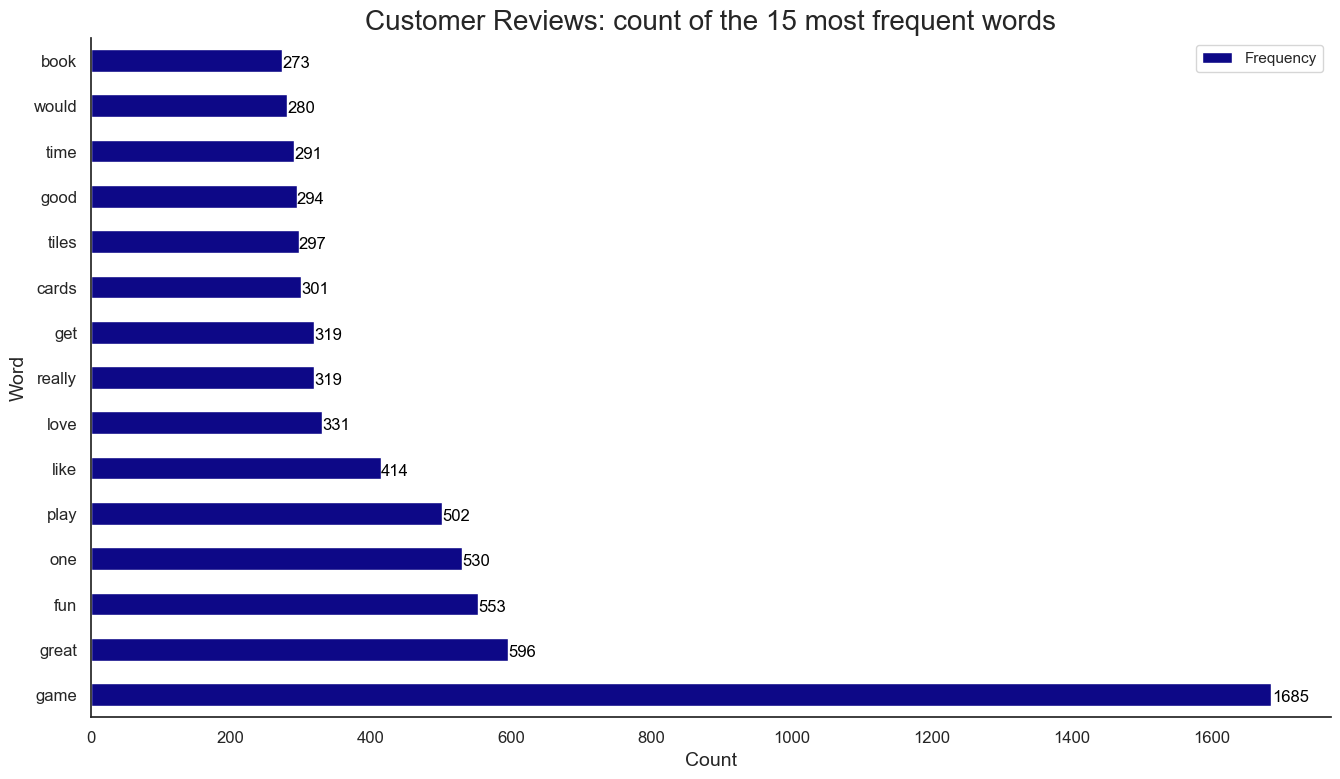

In [179]:
# Plot a diagram for the review column.
# Set the plot type.
plt.rcParams["figure.dpi"] = 100
ax_review = counts_review.plot(kind='barh', figsize=(16, 9), fontsize = 12, colormap ='plasma')

# Set the labels.
ax_review.set_xlabel('Count', fontsize=14)
ax_review.set_ylabel('Word', fontsize=14)
ax_review.set_title("Customer Reviews: count of the 15 most frequent words",
                    fontsize=20)

# Draw the bar labels.
for i in ax_review.patches:
    ax_review.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
                   fontsize=12, color='black')

# Remove the top and right spines from the plot.
sns.despine()

# Print the plot.
ax_review.figure.savefig('Review - 15 most frequent words.jpg')

In [180]:
# Generate a DataFrame from Counter for summary.
counts_summary = pd.DataFrame(Counter(tokens_summary2).most_common(15),
                              columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

Frequency
Word                
stars            466
five             381
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

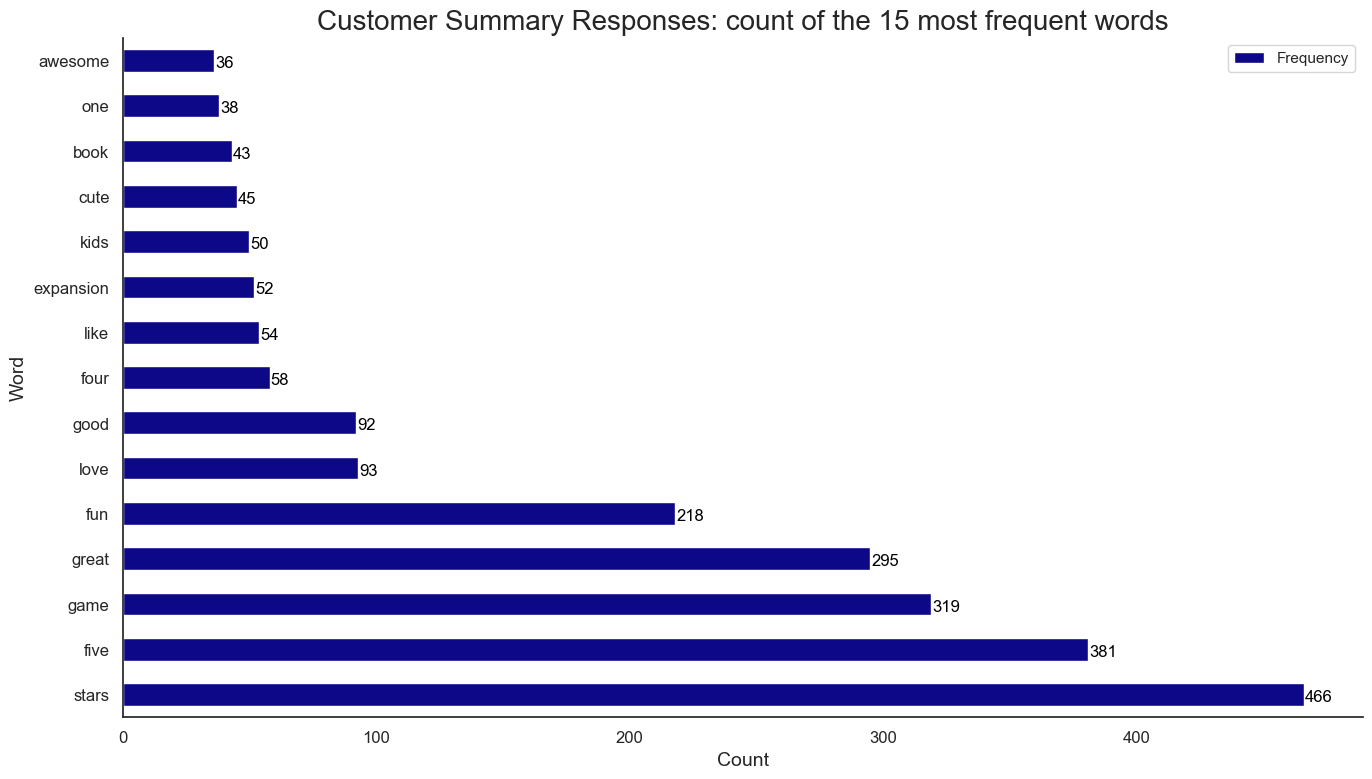

In [181]:
# Plot a diagram for the summary column.
# Set the plot type.
plt.rcParams["figure.dpi"] = 100
ax_summary = counts_summary.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap ='plasma')

# Set the labels.
ax_summary.set_xlabel('Count', fontsize=14)
ax_summary.set_ylabel('Word', fontsize=14)
ax_summary.set_title("Customer Summary Responses: count of the 15 most frequent words",
                    fontsize=20)

# Draw the bar labels.
for i in ax_summary.patches:
    ax_summary.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
                    fontsize=12, color='black')

# Remove the top and right spines from the plot.
sns.despine()

# Print the plot.
ax_summary.figure.savefig('Summary - 15 most frequent words.jpg')

## 5. Review sentiment polarity and subjectivity.

In [182]:
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [183]:
# Determine polarity of both columns. 
df3['polarity_review'] = df3['review'].apply(generate_polarity)
df3['polarity_summary'] = df3['summary'].apply(generate_polarity)

# View output.
df3.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       review_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      summary_tokens  polarity_review  \
0  [the, fact, that, 50, of, this, space, is, was...        -0.036111   
1  [another, worthless, dungeon, masters, screen,...         0.035952   
2               [pretty, but, also, pretty, useless]         0.116640   
3                                      [five, stars]         0.578788   
4                                      [money, trap]        -0.316667   

   polarity_summary  
0              0.15  
1             -0.80  
2              0.00  
3              0.00  
4              0.00

In [184]:
# Determine subjectivity of both columns. 
df3['subjectivity_review'] = df3['review'].apply(generate_subjectivity)
df3['subjectivity_summary'] = df3['summary'].apply(generate_subjectivity)

# View output.
df3.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       review_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      summary_tokens  polarity_review  \
0  [the, fact, that, 50, of, this, space, is, was...        -0.036111   
1  [another, worthless, dungeon, masters, screen,...         0.035952   
2               [pretty, but, also, pretty, useless]         0.116640   
3                                      [five, stars]         0.578788   
4                                      [money, trap]        -0.316667   

   polarity_summary  subjectivity_review  subjectivity_summary  
0              0.15             0.486111              0.500000  
1             -0.80             0.442976              0.900000  
2              0.00             0.430435              0.733333  
3              0.00             0.784848              0.000000  
4              0.00             0.316667              0.000000

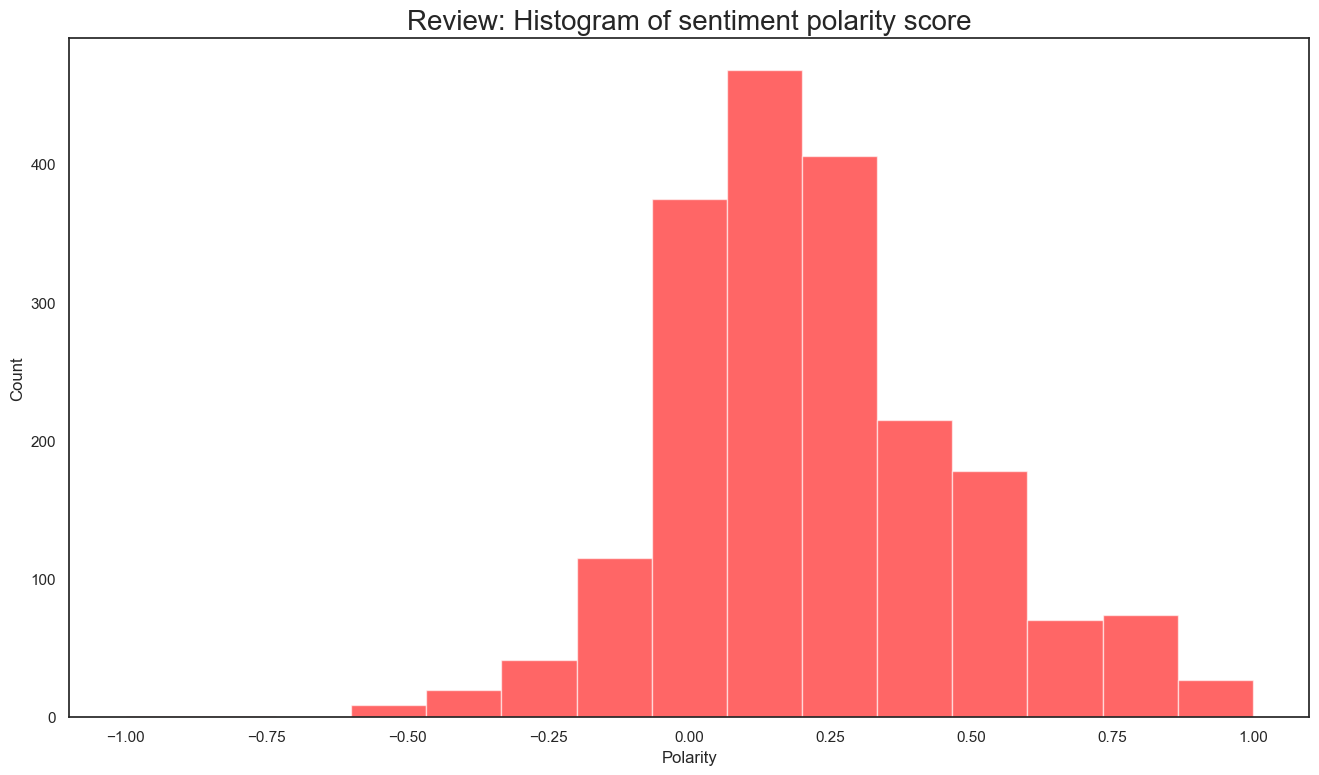

In [185]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review: Histogram of sentiment polarity score', fontsize=20)

plt.show()

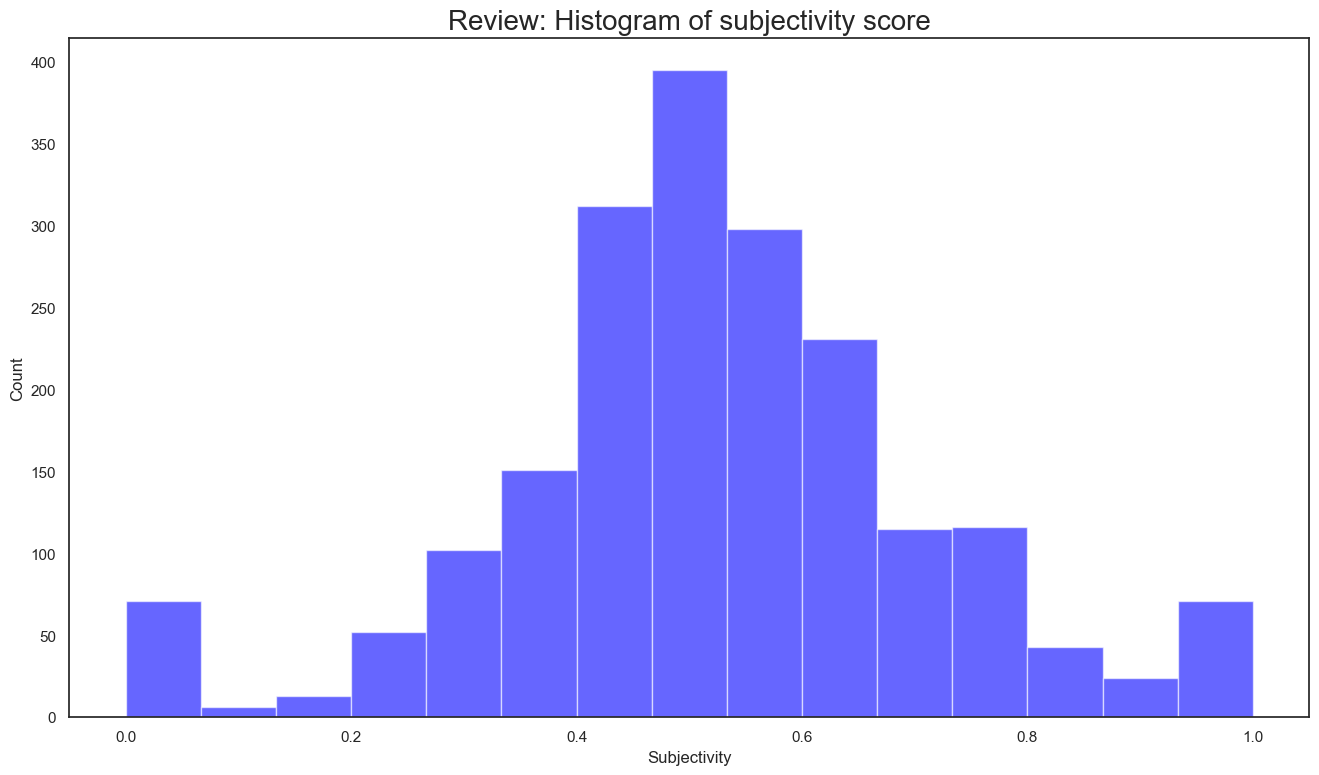

In [186]:
# Review: Create a histogram plot with bins = 15.
# Histogram of subjectivity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['subjectivity_review'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review: Histogram of subjectivity score', fontsize=20)

plt.show()

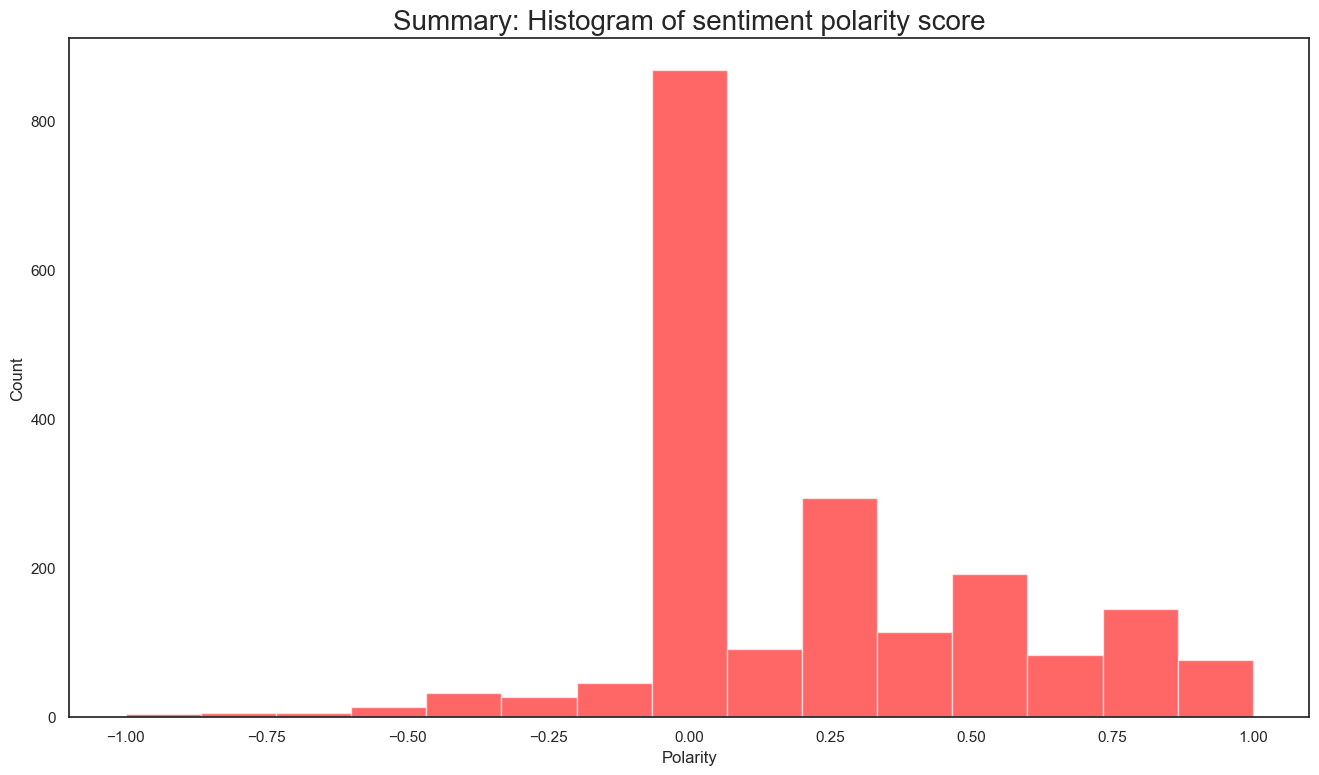

In [187]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary: Histogram of sentiment polarity score', fontsize=20)

plt.show()

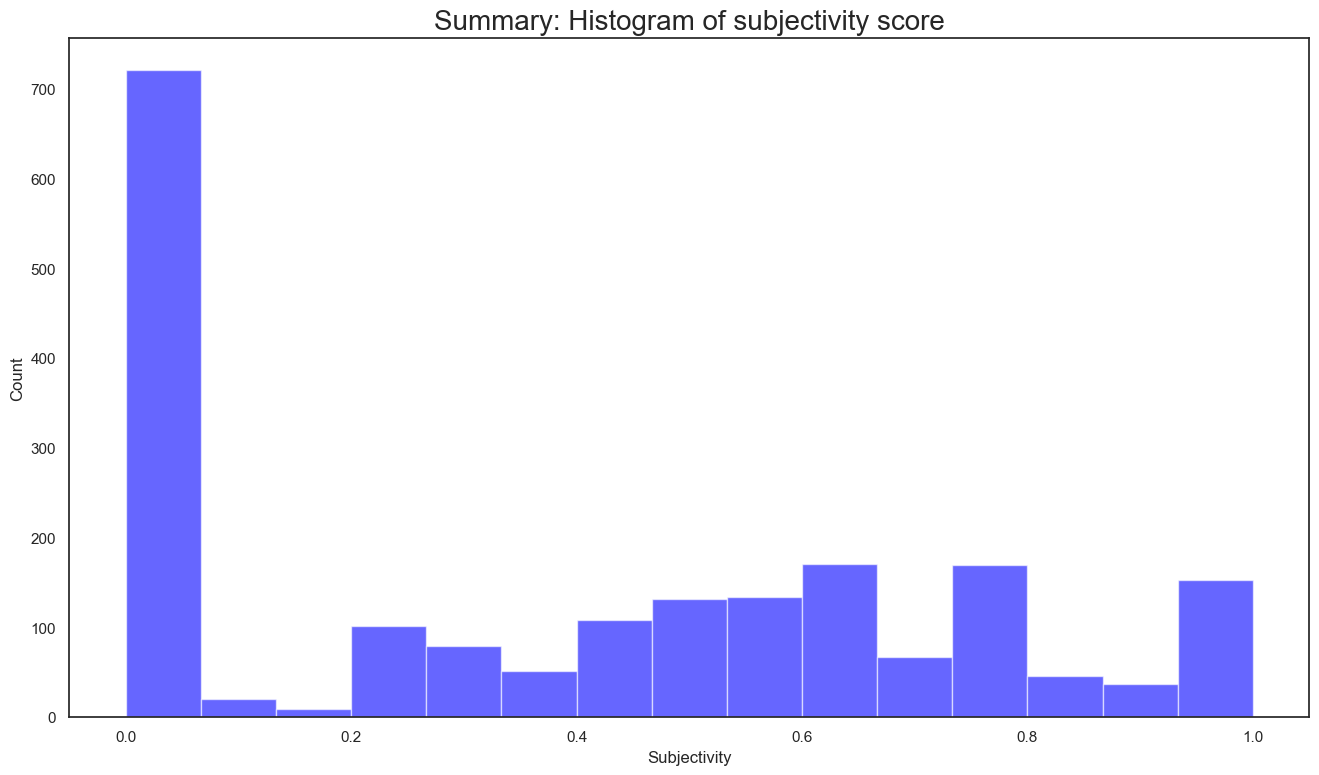

In [188]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of subjectivity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['subjectivity_summary'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary: Histogram of subjectivity score', fontsize=20)

plt.show()

> From these diagrams we can conclude that:
> - Reviews: the sentiment polarity score leans towards a positive sentiment. However, most of the reviews have a subjectivity score around 0.5, which makes sense as the customer uses more words in a review than a summary and therefore can tend to be more subjective.  
> - Summaries: the sentiment polarity score leans towards a neutral sentiment, but with a slightly tendency to the positive side. Also, the subjectivity score is quite low so we can confirm the summaries are more objective than the reviews (again, it makes sense as the customer is more precise given a summary).

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [189]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_review = df3.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
negative_review = negative_review[['review', 'polarity_review', 'subjectivity_review']]

# View output, adjust the column width for a better layout.
negative_review.style.set_properties(subset=['review'], **{'width': '1200px'})

In [190]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_summary = df3.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_summary = negative_summary[['summary', 'polarity_summary', 'subjectivity_summary']]

# View output, adjust the column width for a better layout.
negative_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

In [191]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_review = df3.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_review = positive_review[['review', 'polarity_review', 'subjectivity_review']]

# View output, adjust the column width for a better layout.
positive_review.style.set_properties(subset=['review'], **{'width': '1200px'})

In [192]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_summary = df3.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_summary = positive_summary[['summary', 'polarity_summary', 'subjectivity_summary']]

# View output, adjust the column width for a better layout.
positive_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

## 7. Observations and insights

***We have identified the 15 most common words in both the review and summary columns, as requested by Turtle Games. We will provide them with visualisations that describe these in an easy to read format. We have also identified that the reviews tend to be a bit more subjective than the summaries of the reviews, so worth pointing this out to the marketing team. We have extracted the top 20 positive and negative reviews and summaries. We can extract a lot of information from these, which will help to draw conclusions. The words that appear the most on the negative side are:***
- Negative reviews: boring, difficult, expensive.
- Negative summaries: boring, dissapointing.

***The words that appear the most on the positive side are:***
- Positive reviews: awesome/ perfect product.
- Positive summaries: awesome/ excellent product.

# References/ resources used on this exercise:
- https://www.python-graph-gallery.com/
- https://seaborn.pydata.org/
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://www.nltk.org/book/
- https://stackoverflow.com/
- https://towardsdatascience.com/

# 